In [601]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. import, 환경설정, 점검

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Batang') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='default') # 경고 메세지
warnings.filterwarnings(action='ignore') # 경고 메세지 무시

Text(0, 0.5, '한글화 체크')

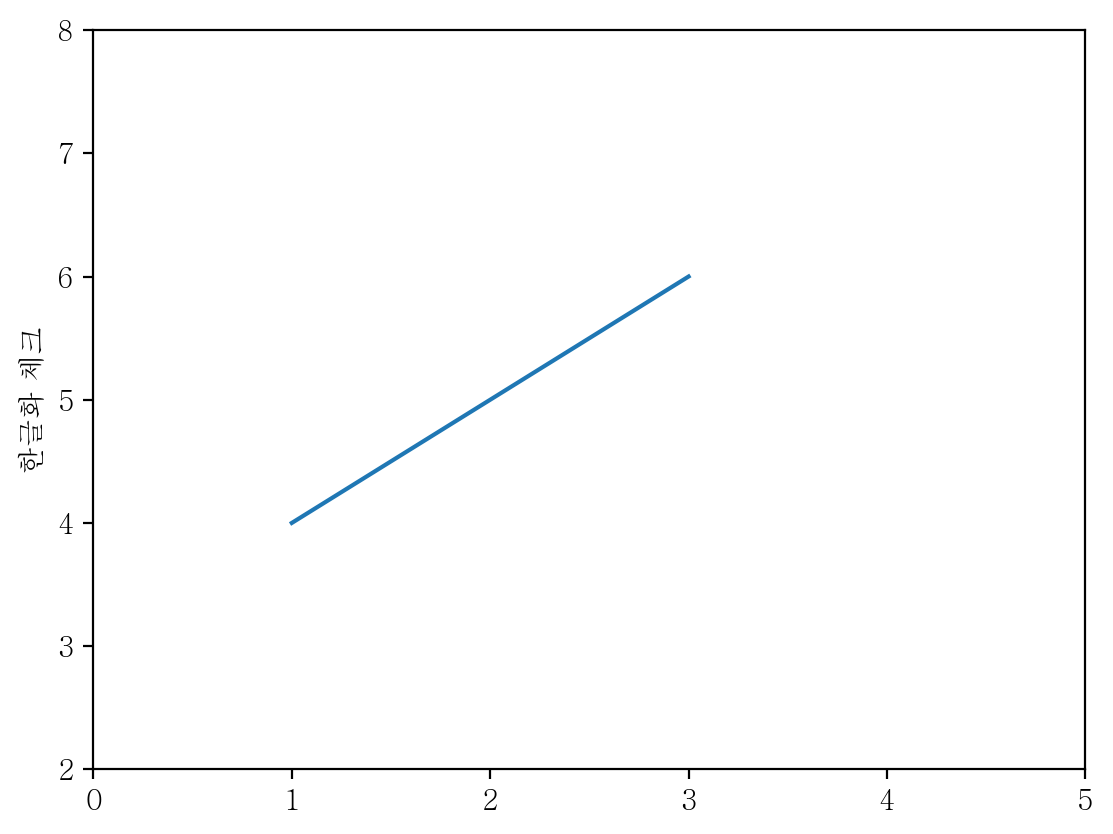

In [18]:
x = [1,2,3]
y = [4,5,6]
ax = plt.plot(x,y)
plt.xlim([0,5])
plt.ylim([2,8])
plt.ylabel('한글화 체크')

# 2. 서울과 부산 데이터만 df변수

In [20]:
# 서울 소상공인 데이터
df_seoul = pd.read_csv('C:/ai_x/download/sharedata/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                       # low_memory=False,
                      # encoding='utf-8',
                      #sep = ','
                      )
df_seoul.shape

(540517, 39)

In [21]:
# 부산 소상공인 데이터
df_busan = pd.read_csv('C:/ai_x/download/sharedata/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_부산_202503.csv',
                       # low_memory=False,
                      # encoding='utf-8',
                      #sep = ','
                      )
df_busan.shape

(155537, 39)

In [25]:
# 두 데이터 컬럼이 같은 지 확인
all(df_seoul.columns == df_busan.columns)

True

In [28]:
df = pd.concat([df_seoul,df_busan], axis = 0)
df.shape

(696054, 39)

In [31]:
# concat 이후 인덱스가 중복되게 설치되므로 reset_index 시행
df.reset_index(drop=True, inplace=True)
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1,NaN,126.855046,37.486242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696049,MA0101202502A0111400,포마크파티룸,NaN,G2,소매,G220,애완동물·용품 소매,G22001,애완동물/애완용품 소매업,G47852,...,2623010300102670003027632,NaN,부산광역시 부산진구 중앙대로 763-1,614843,47251,NaN,4,NaN,129.061019,35.160630
696050,MA0101202502A0114219,정옥농장,NaN,G2,소매,G204,종합 소매,G20404,슈퍼마켓,G47129,...,2671025333102850002000001,NaN,부산광역시 기장군 장안읍 오리길 69-12,619951,46030,NaN,NaN,NaN,129.268218,35.369200
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000


In [37]:
df.index

RangeIndex(start=0, stop=696054, step=1)

In [38]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량
# pip install memory_profiler

In [83]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 2038.58 MiB, increment: 0.00 MiB


In [45]:
del df_seoul, df_busan

NameError: name 'df_seoul' is not defined

In [84]:
%reload_ext memory_profiler
%memit

peak memory: 2038.58 MiB, increment: 0.00 MiB


# 3. df 데이터셋의 결측치 확인 및 시각화
- missingno 라이브러리
- matplotlib
## ⓞ missingno 라이브러리로 결측치 시각화
- pip install missingno => 사전 missingno 라이브러리 필수

<Axes: >

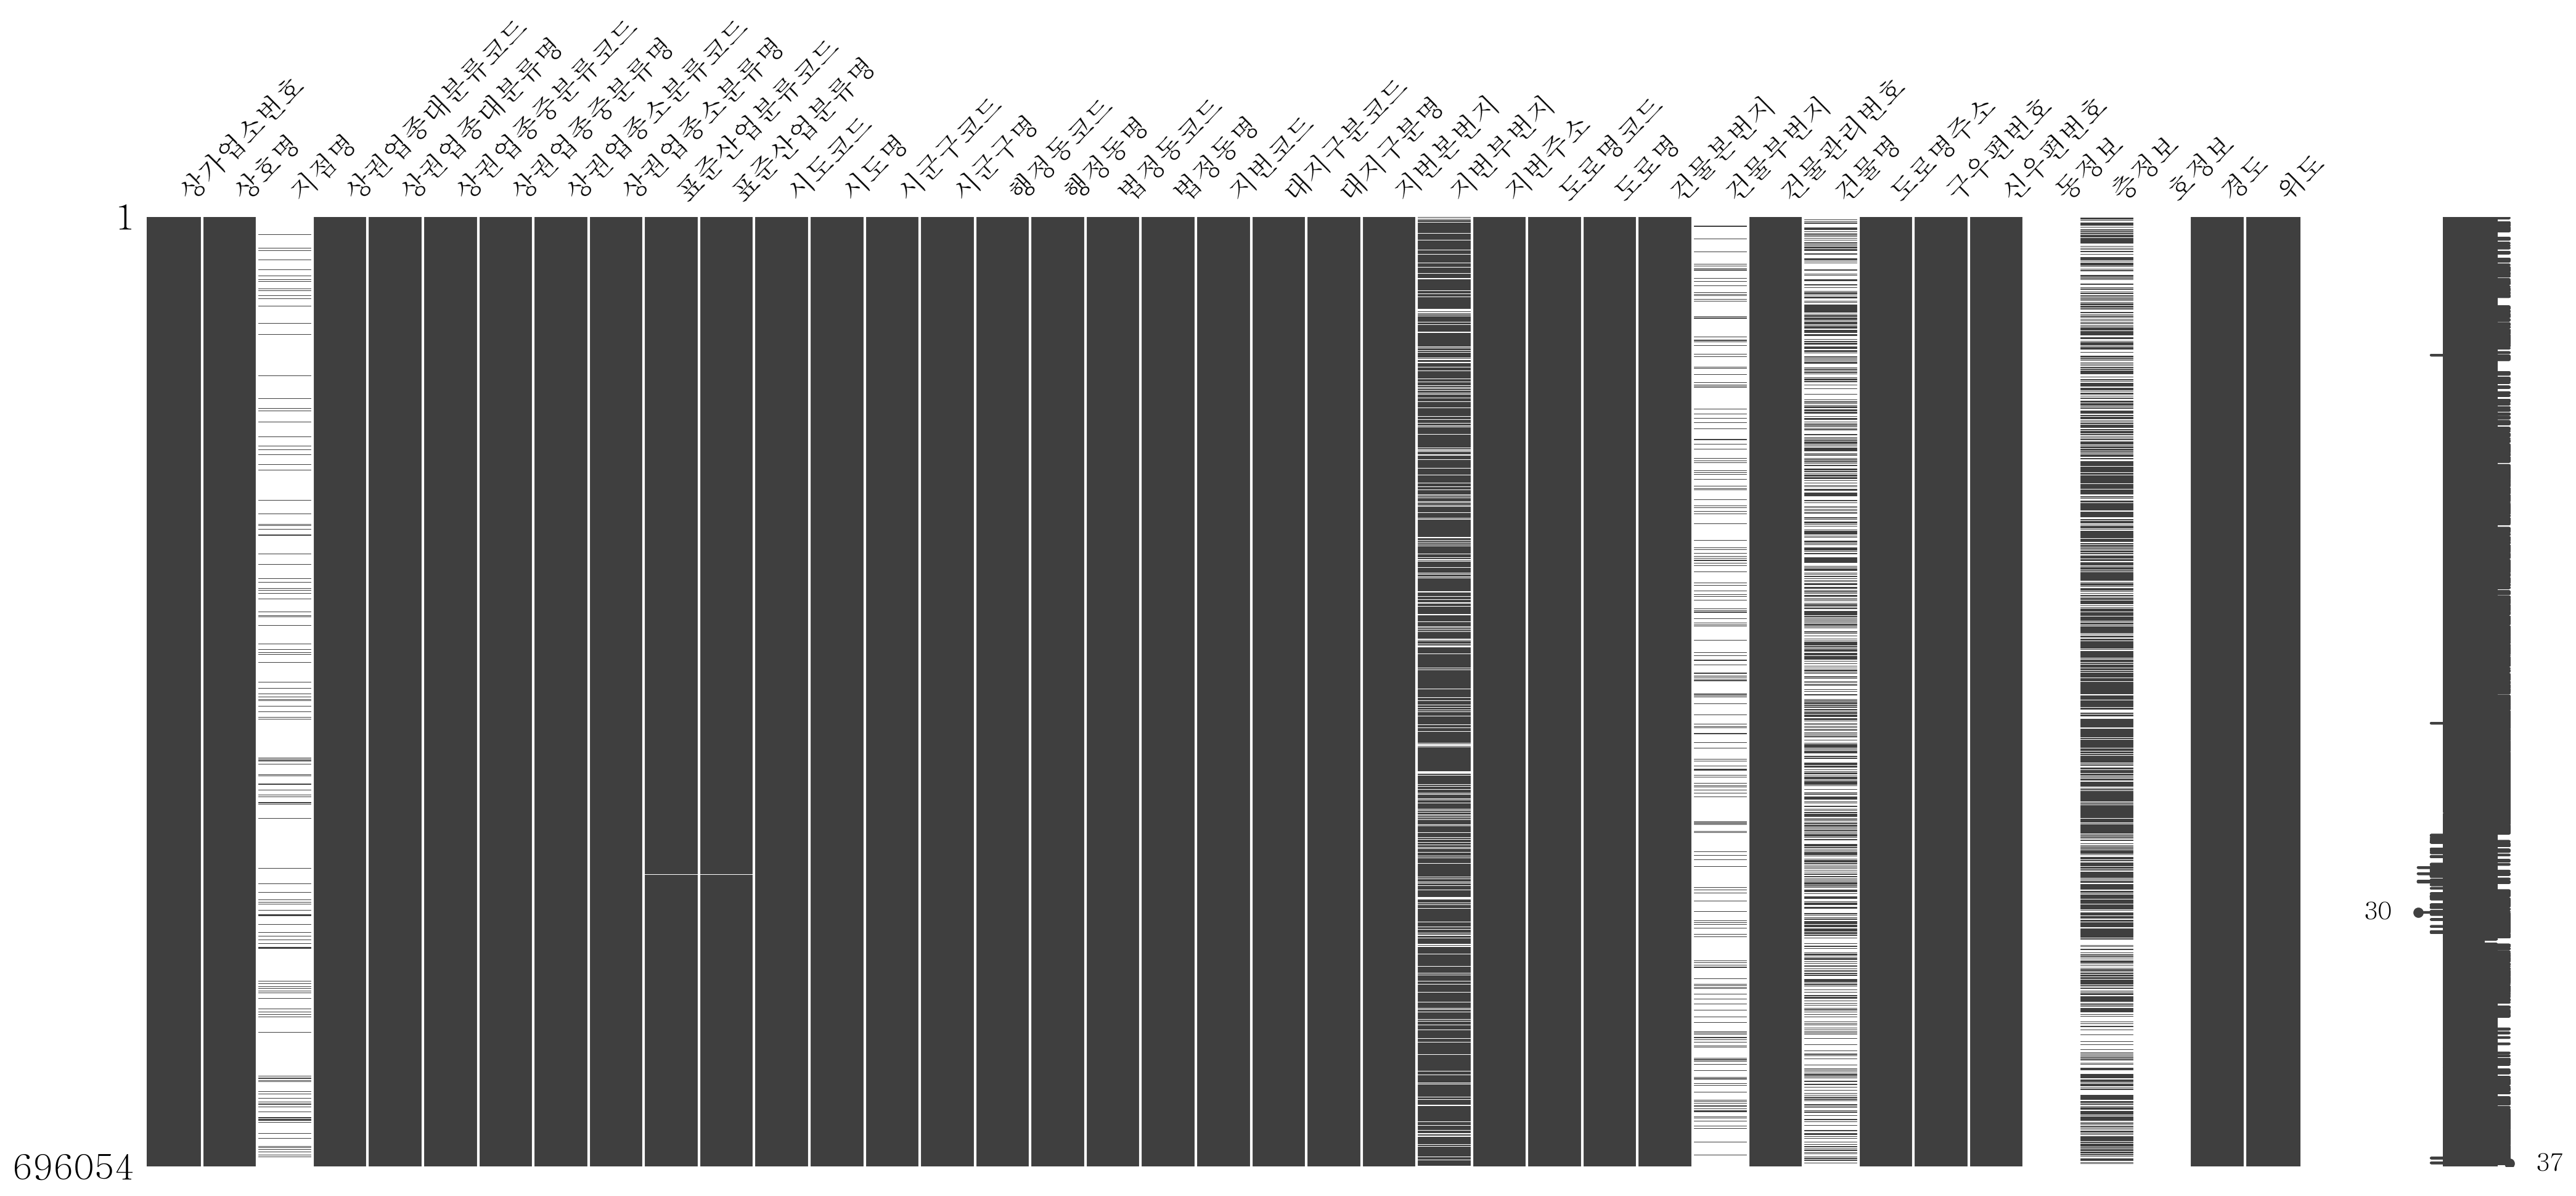

In [48]:
import missingno as msno
%matplotlib inline
msno.matrix(df) # 결측치가 없는 부분은 검정색, 결츨기 부분은 하얀색

<Axes: >

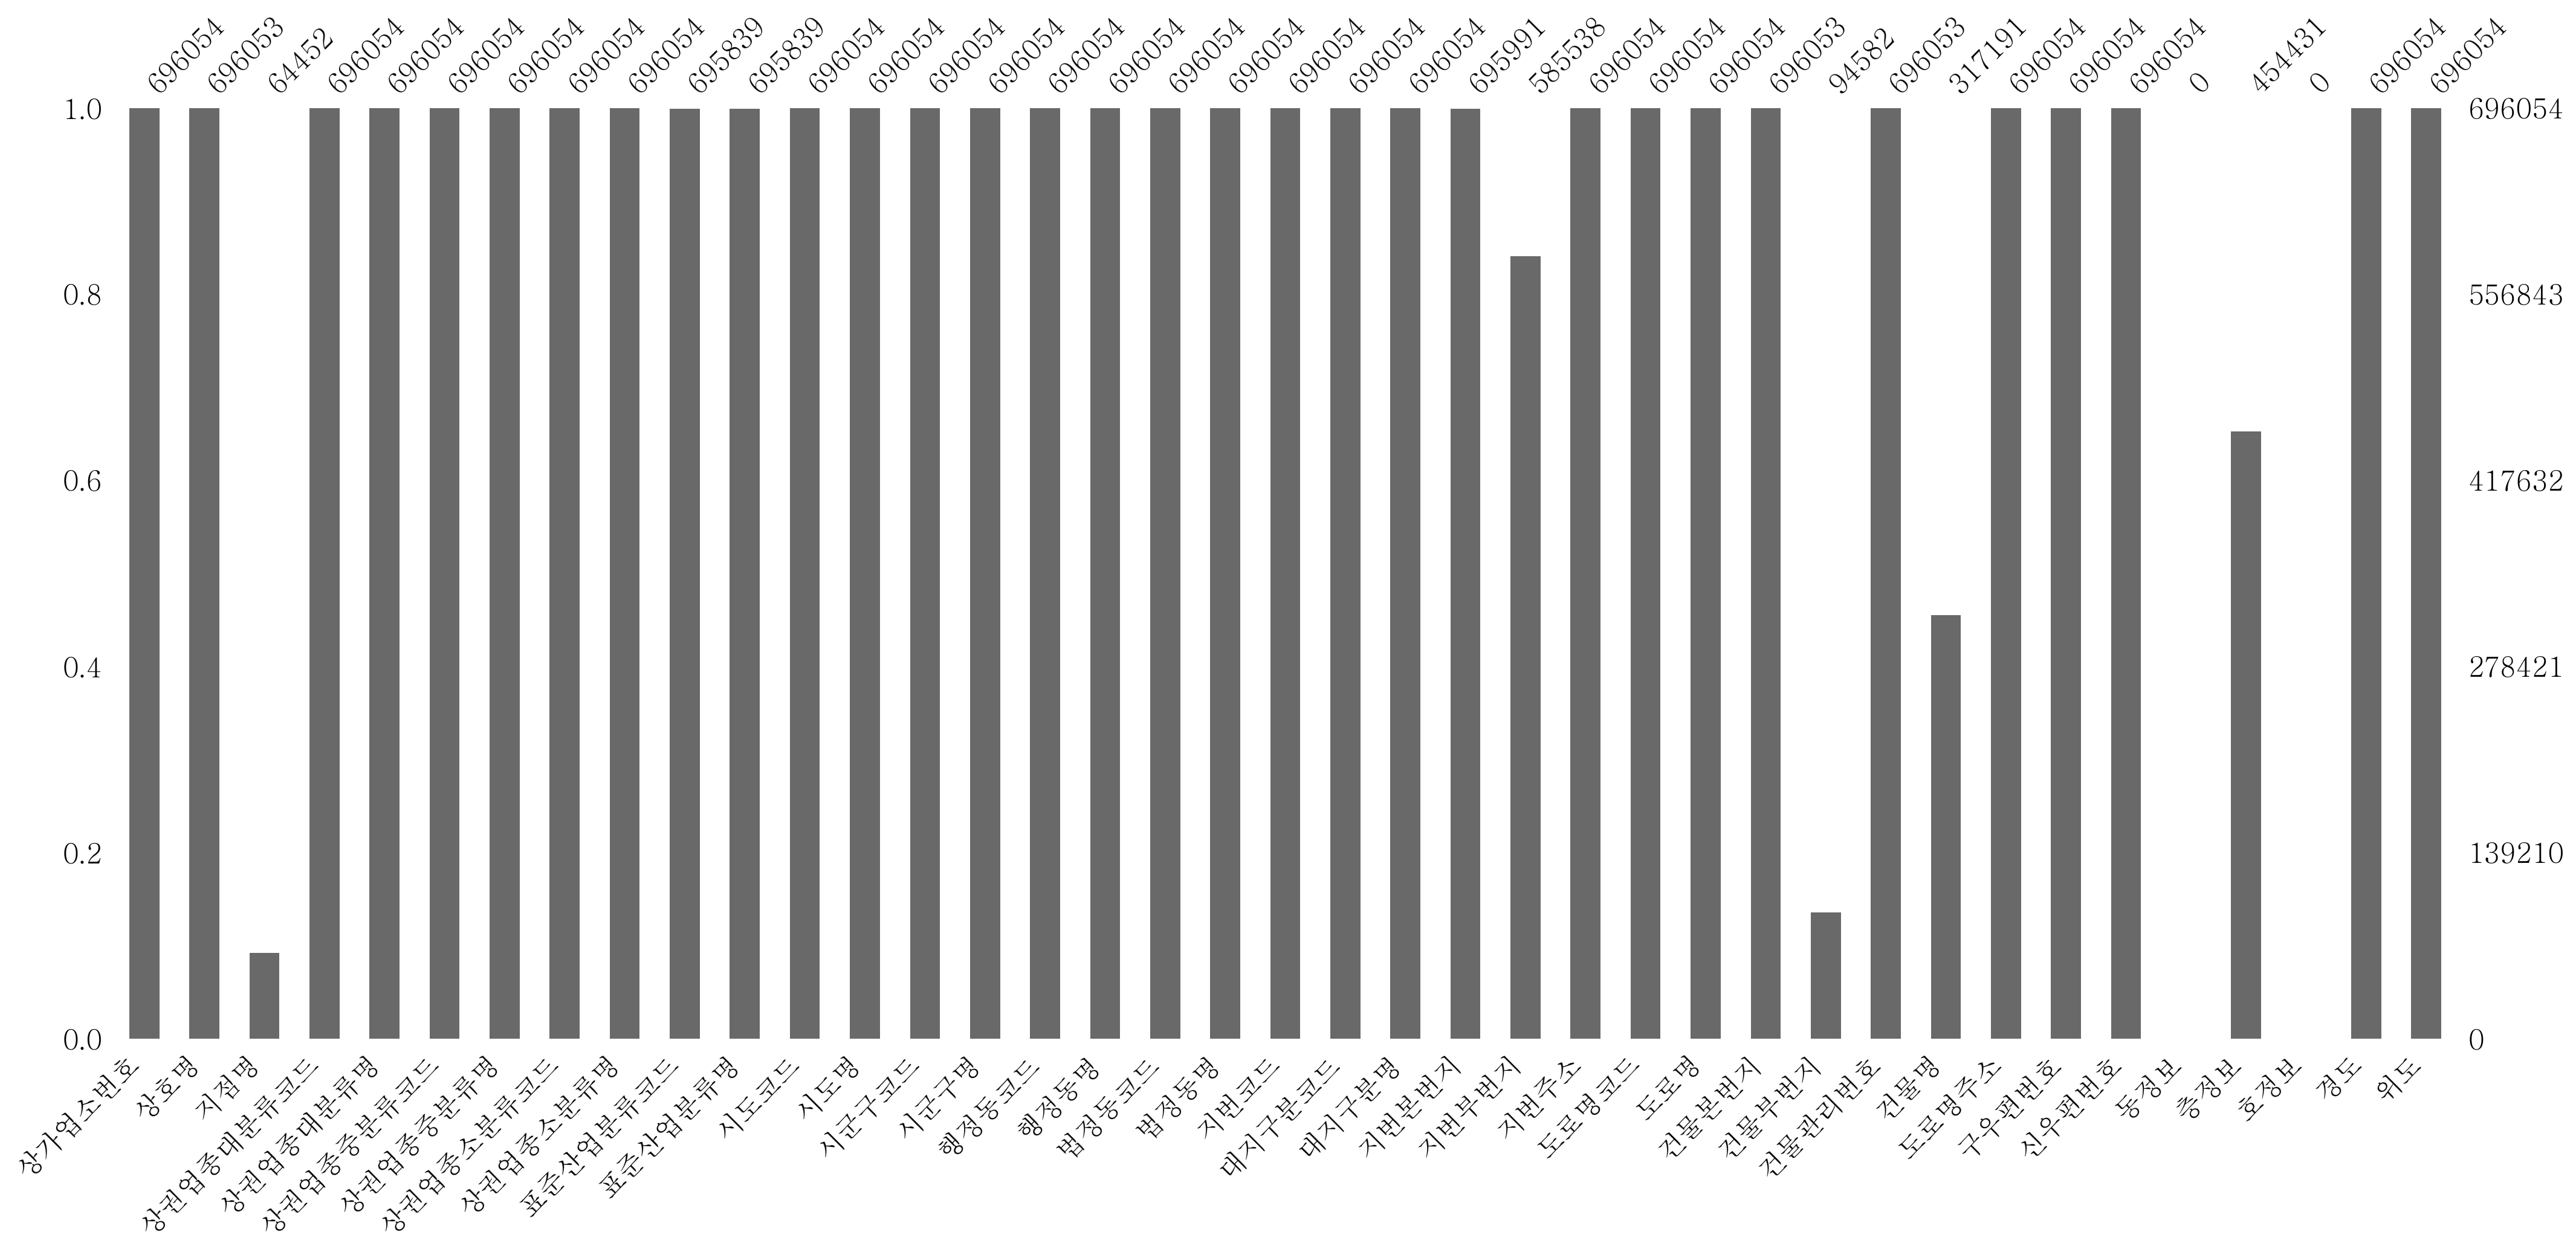

In [51]:
msno.bar(df) # 결측치가 아닌 데이터 개수

<Axes: >

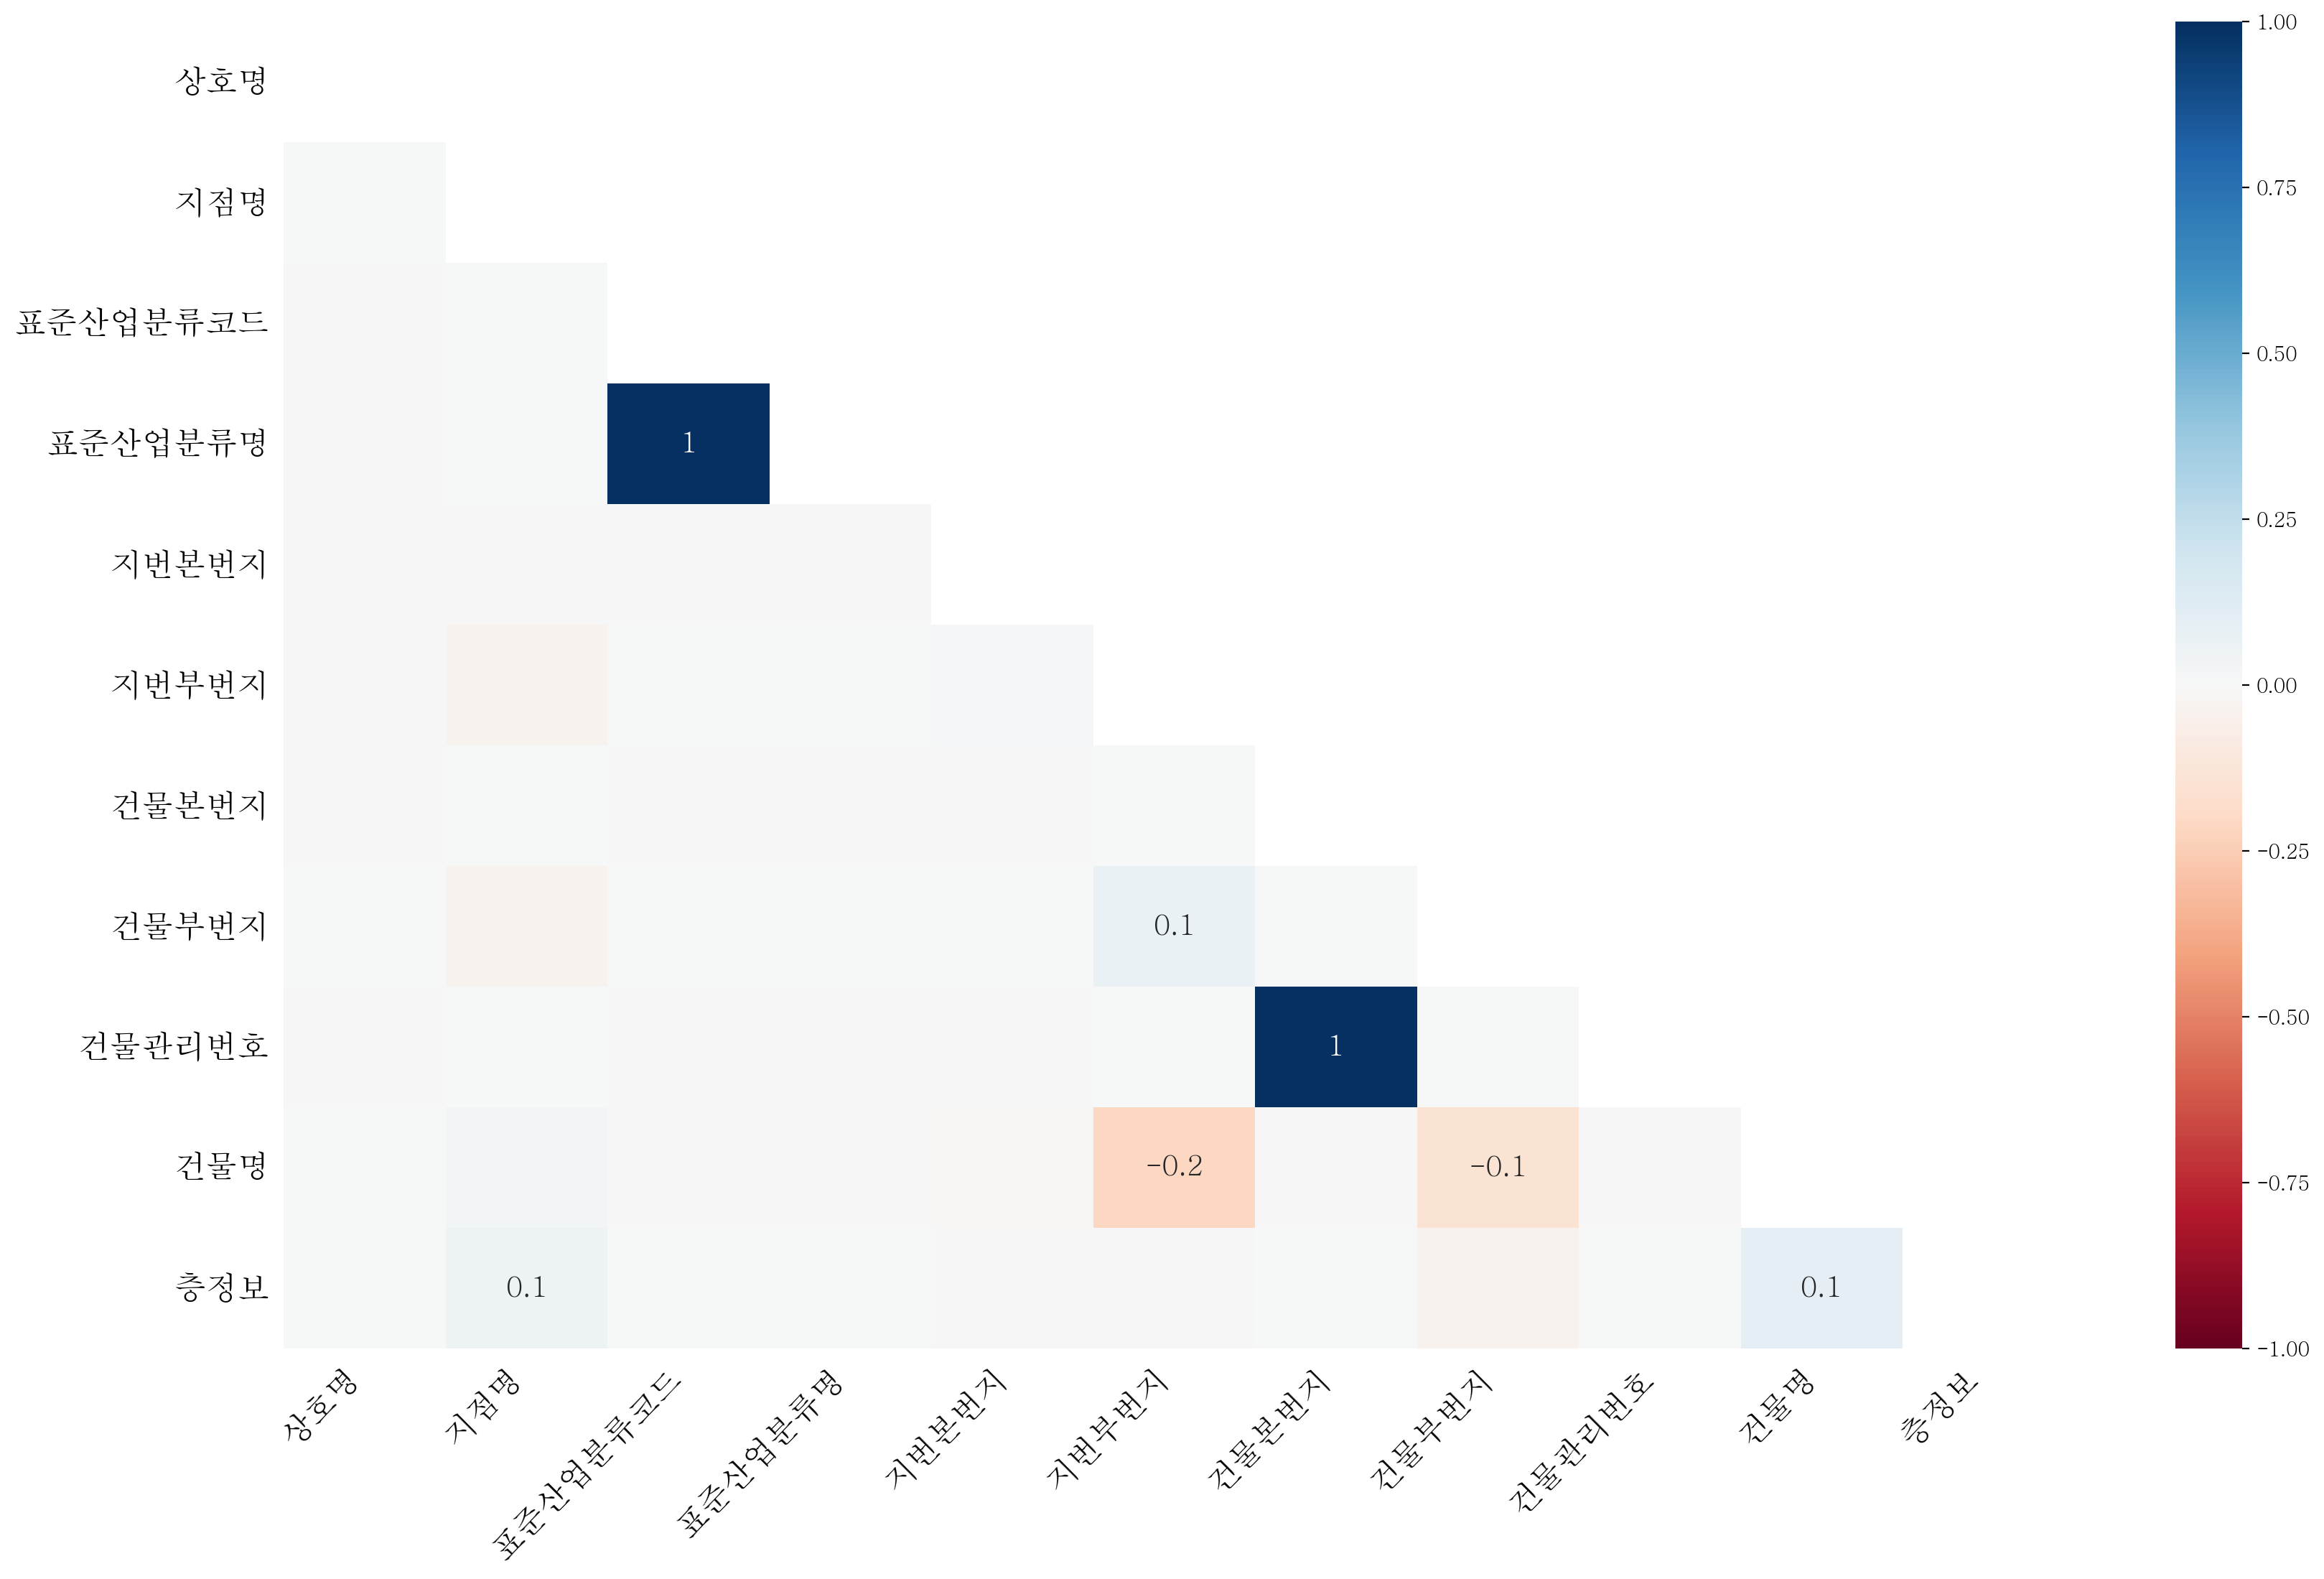

In [54]:
msno.heatmap(df) # corr

<Axes: >

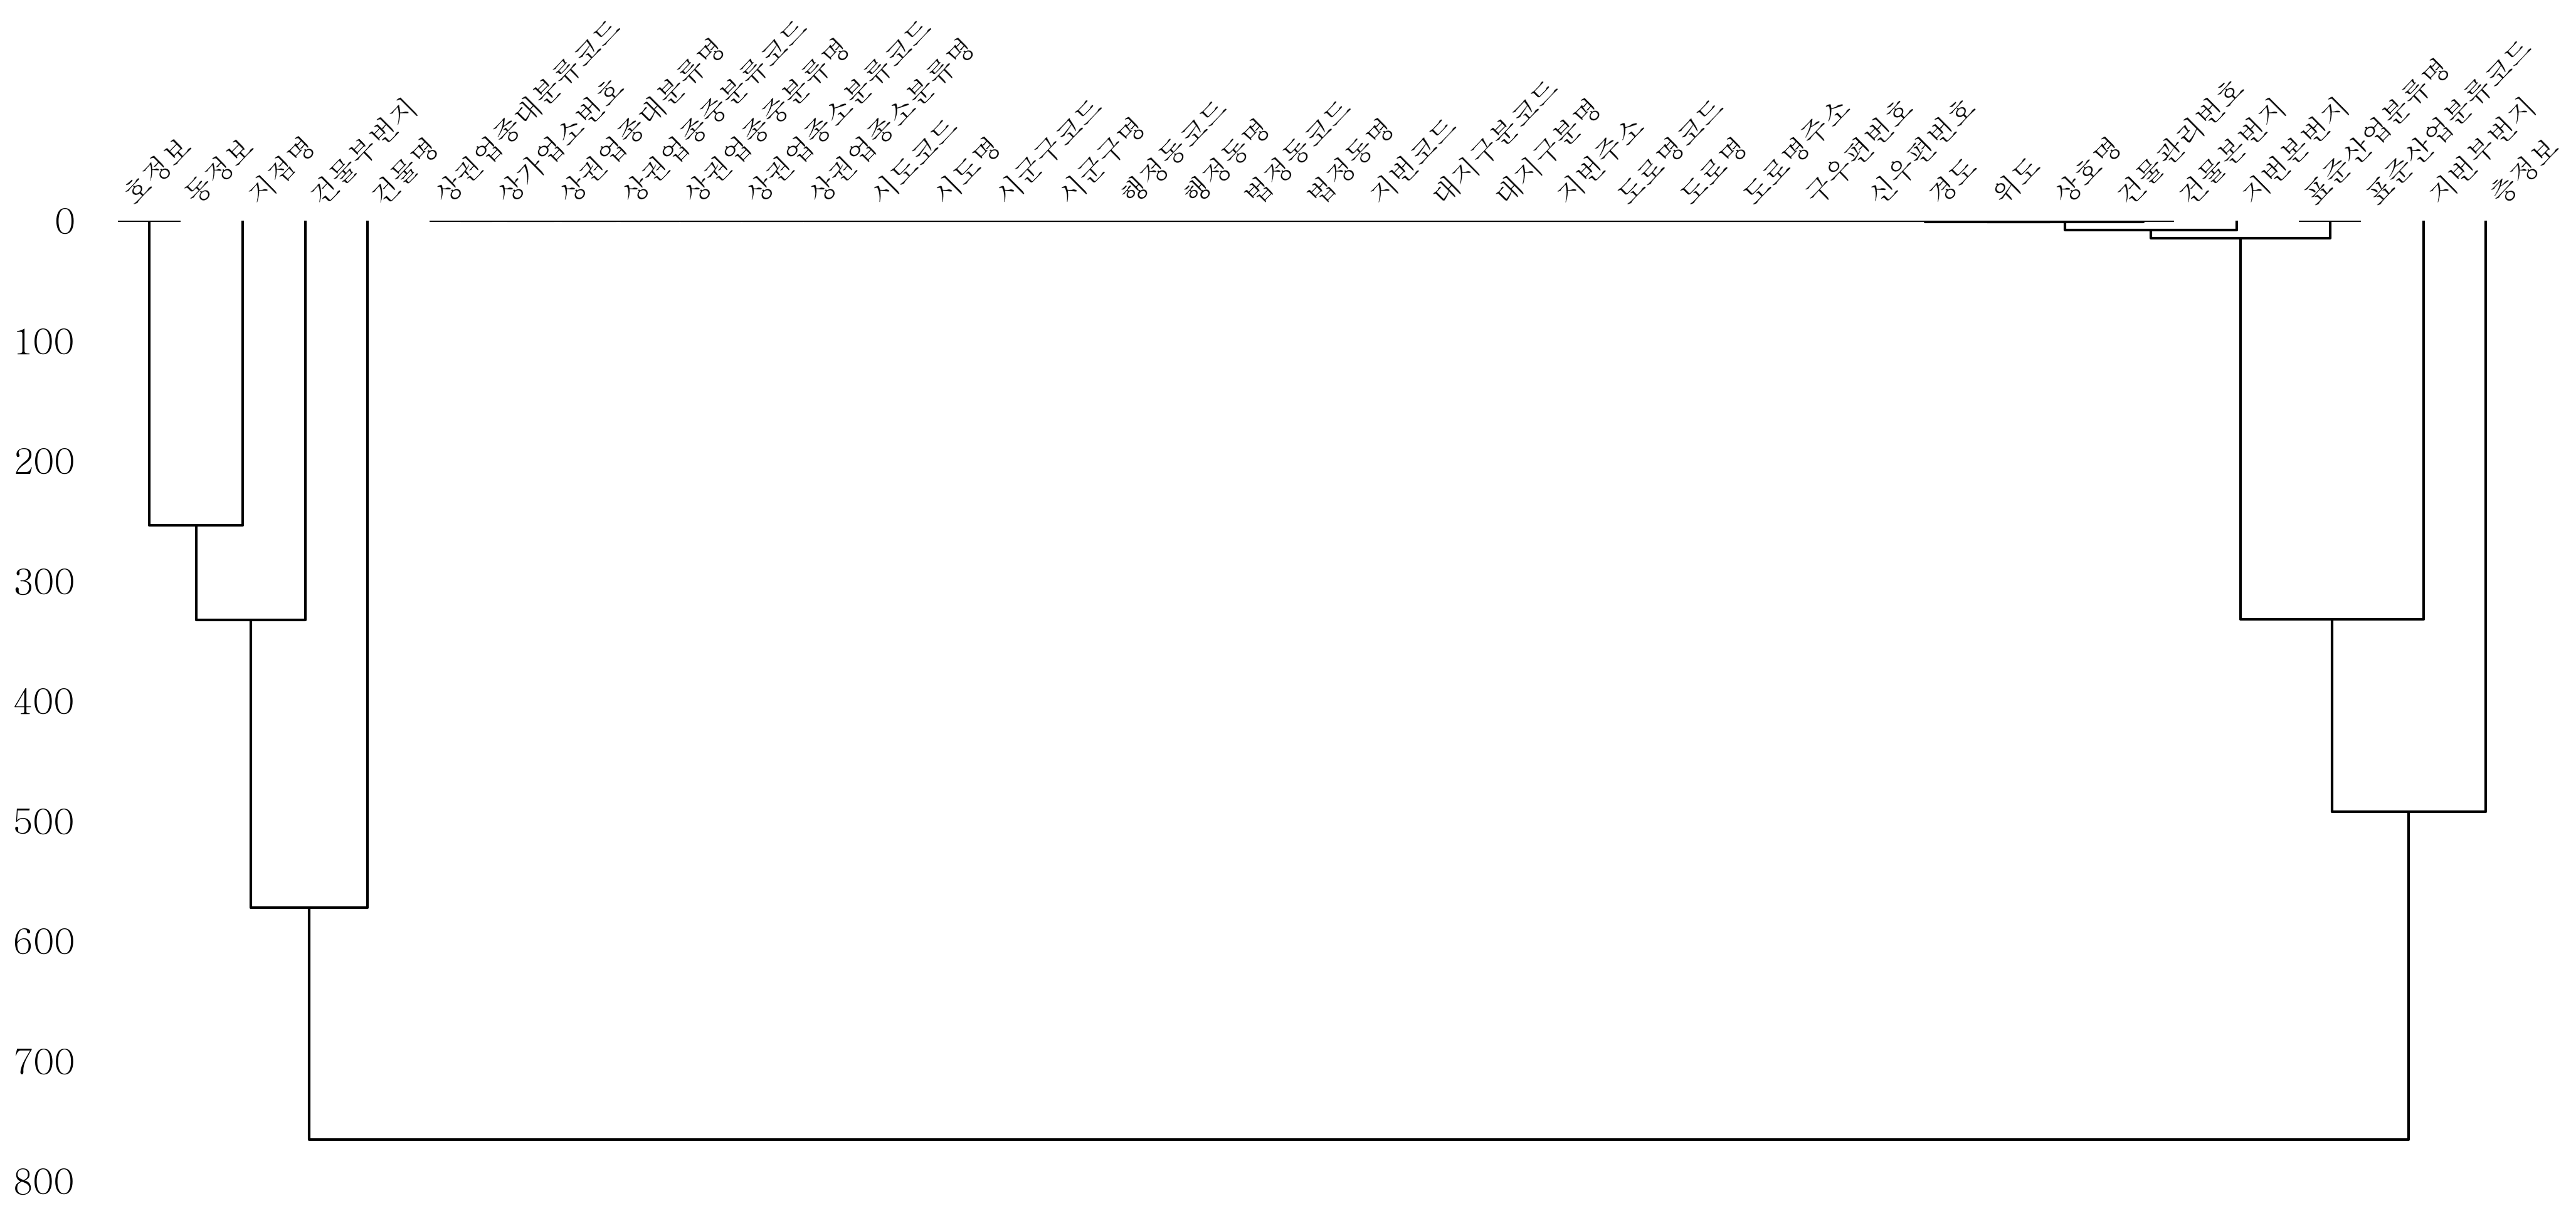

In [55]:
msno.dendrogram(df)

## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.


In [58]:
display(df.head(3), df.tail(3))

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000
696053,MA0101202502A0114753,안목,부산역점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2617010100112000004006724,NaN,부산광역시 동구 중앙대로214번길 3-10,601838,48733,NaN,1,NaN,129.041453,35.116696


## ② df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

## ③ 결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

In [68]:
# 열별 결측치 개수
missing_cnt = df.isnull().sum()
missing_cnt.info()

<class 'pandas.core.series.Series'>
Index: 39 entries, 상가업소번호 to 위도
Series name: None
Non-Null Count  Dtype
--------------  -----
39 non-null     int64
dtypes: int64(1)
memory usage: 624.0+ bytes


<Axes: >

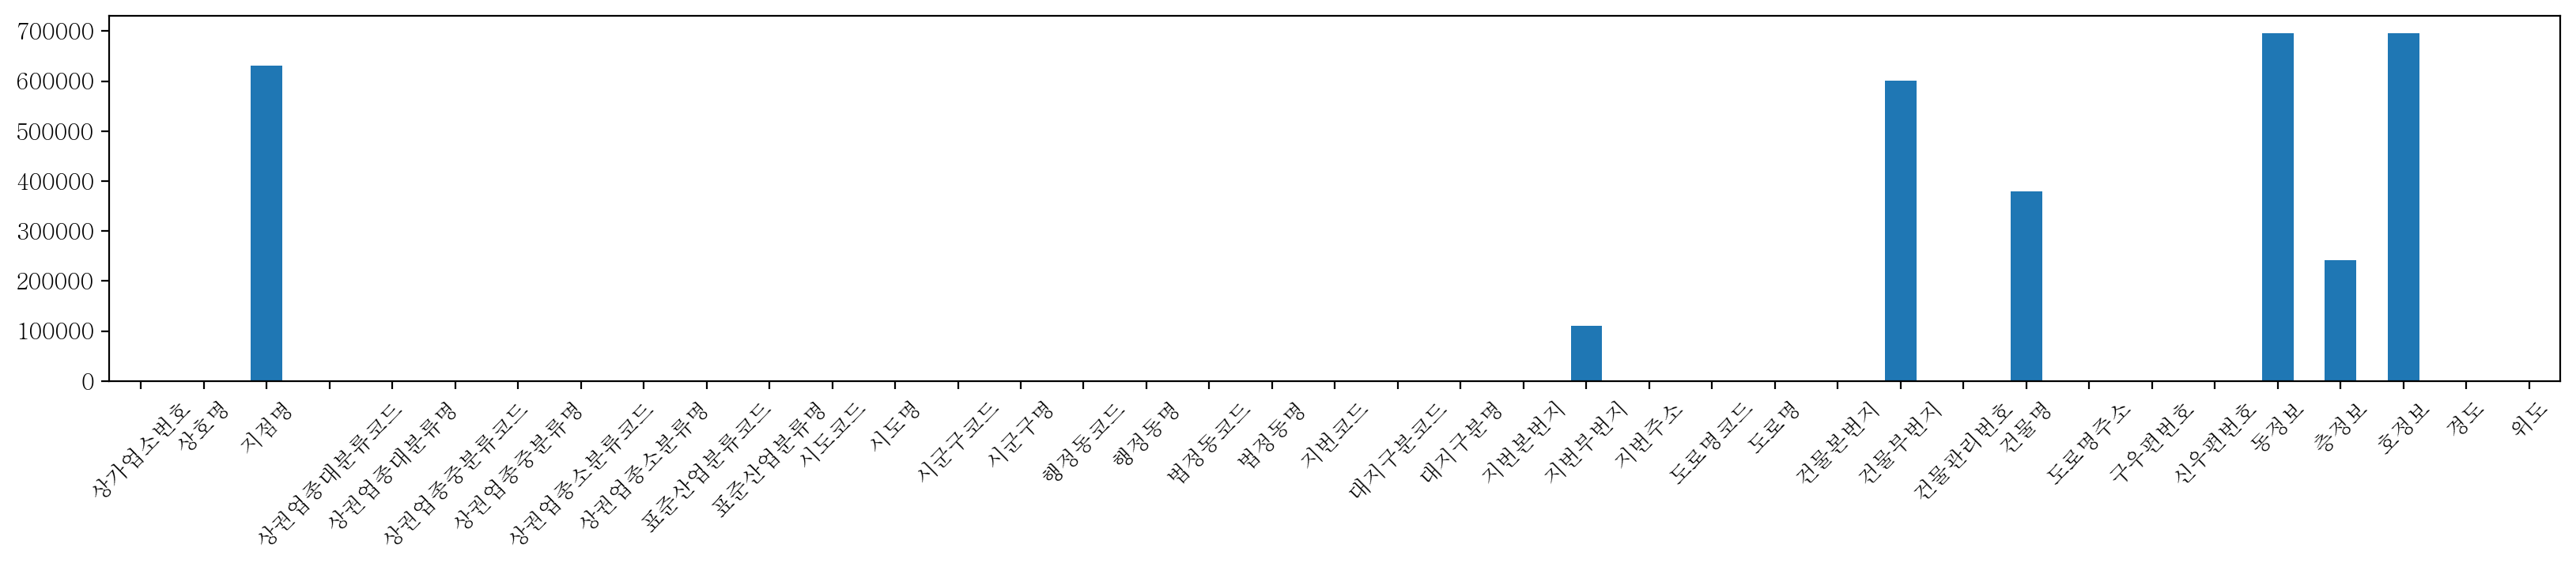

In [64]:
missing_cnt.plot.bar(figsize=(20,3), rot = 45)

<Axes: >

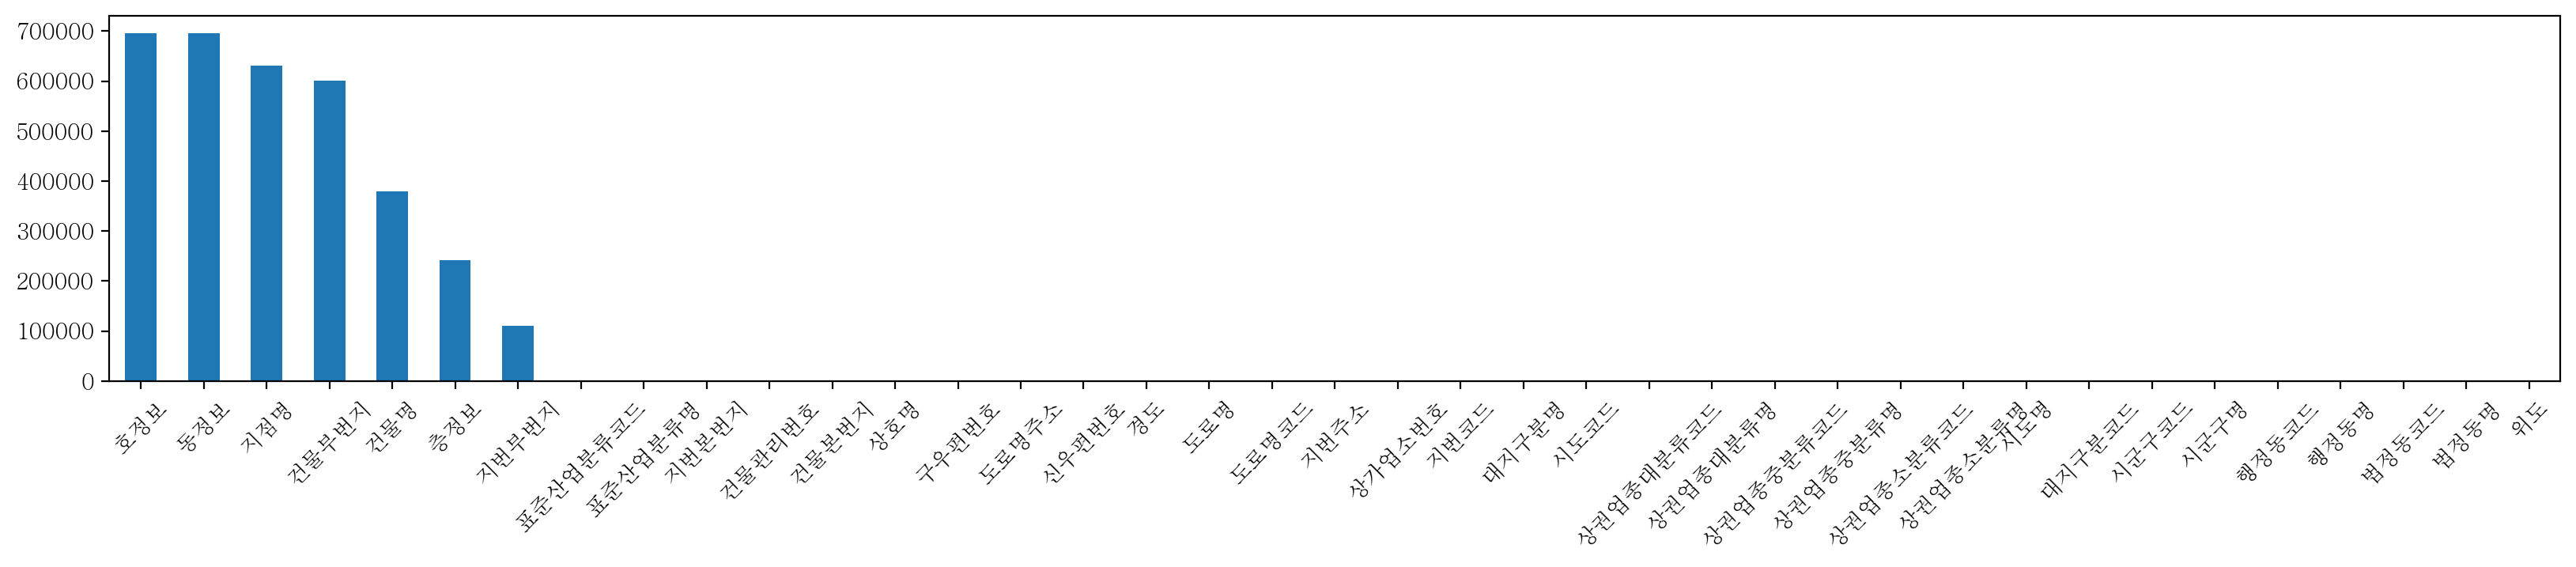

In [67]:
missing_cnt.sort_values(ascending = False).plot.bar(figsize=(20,3), rot = 45)

<Axes: >

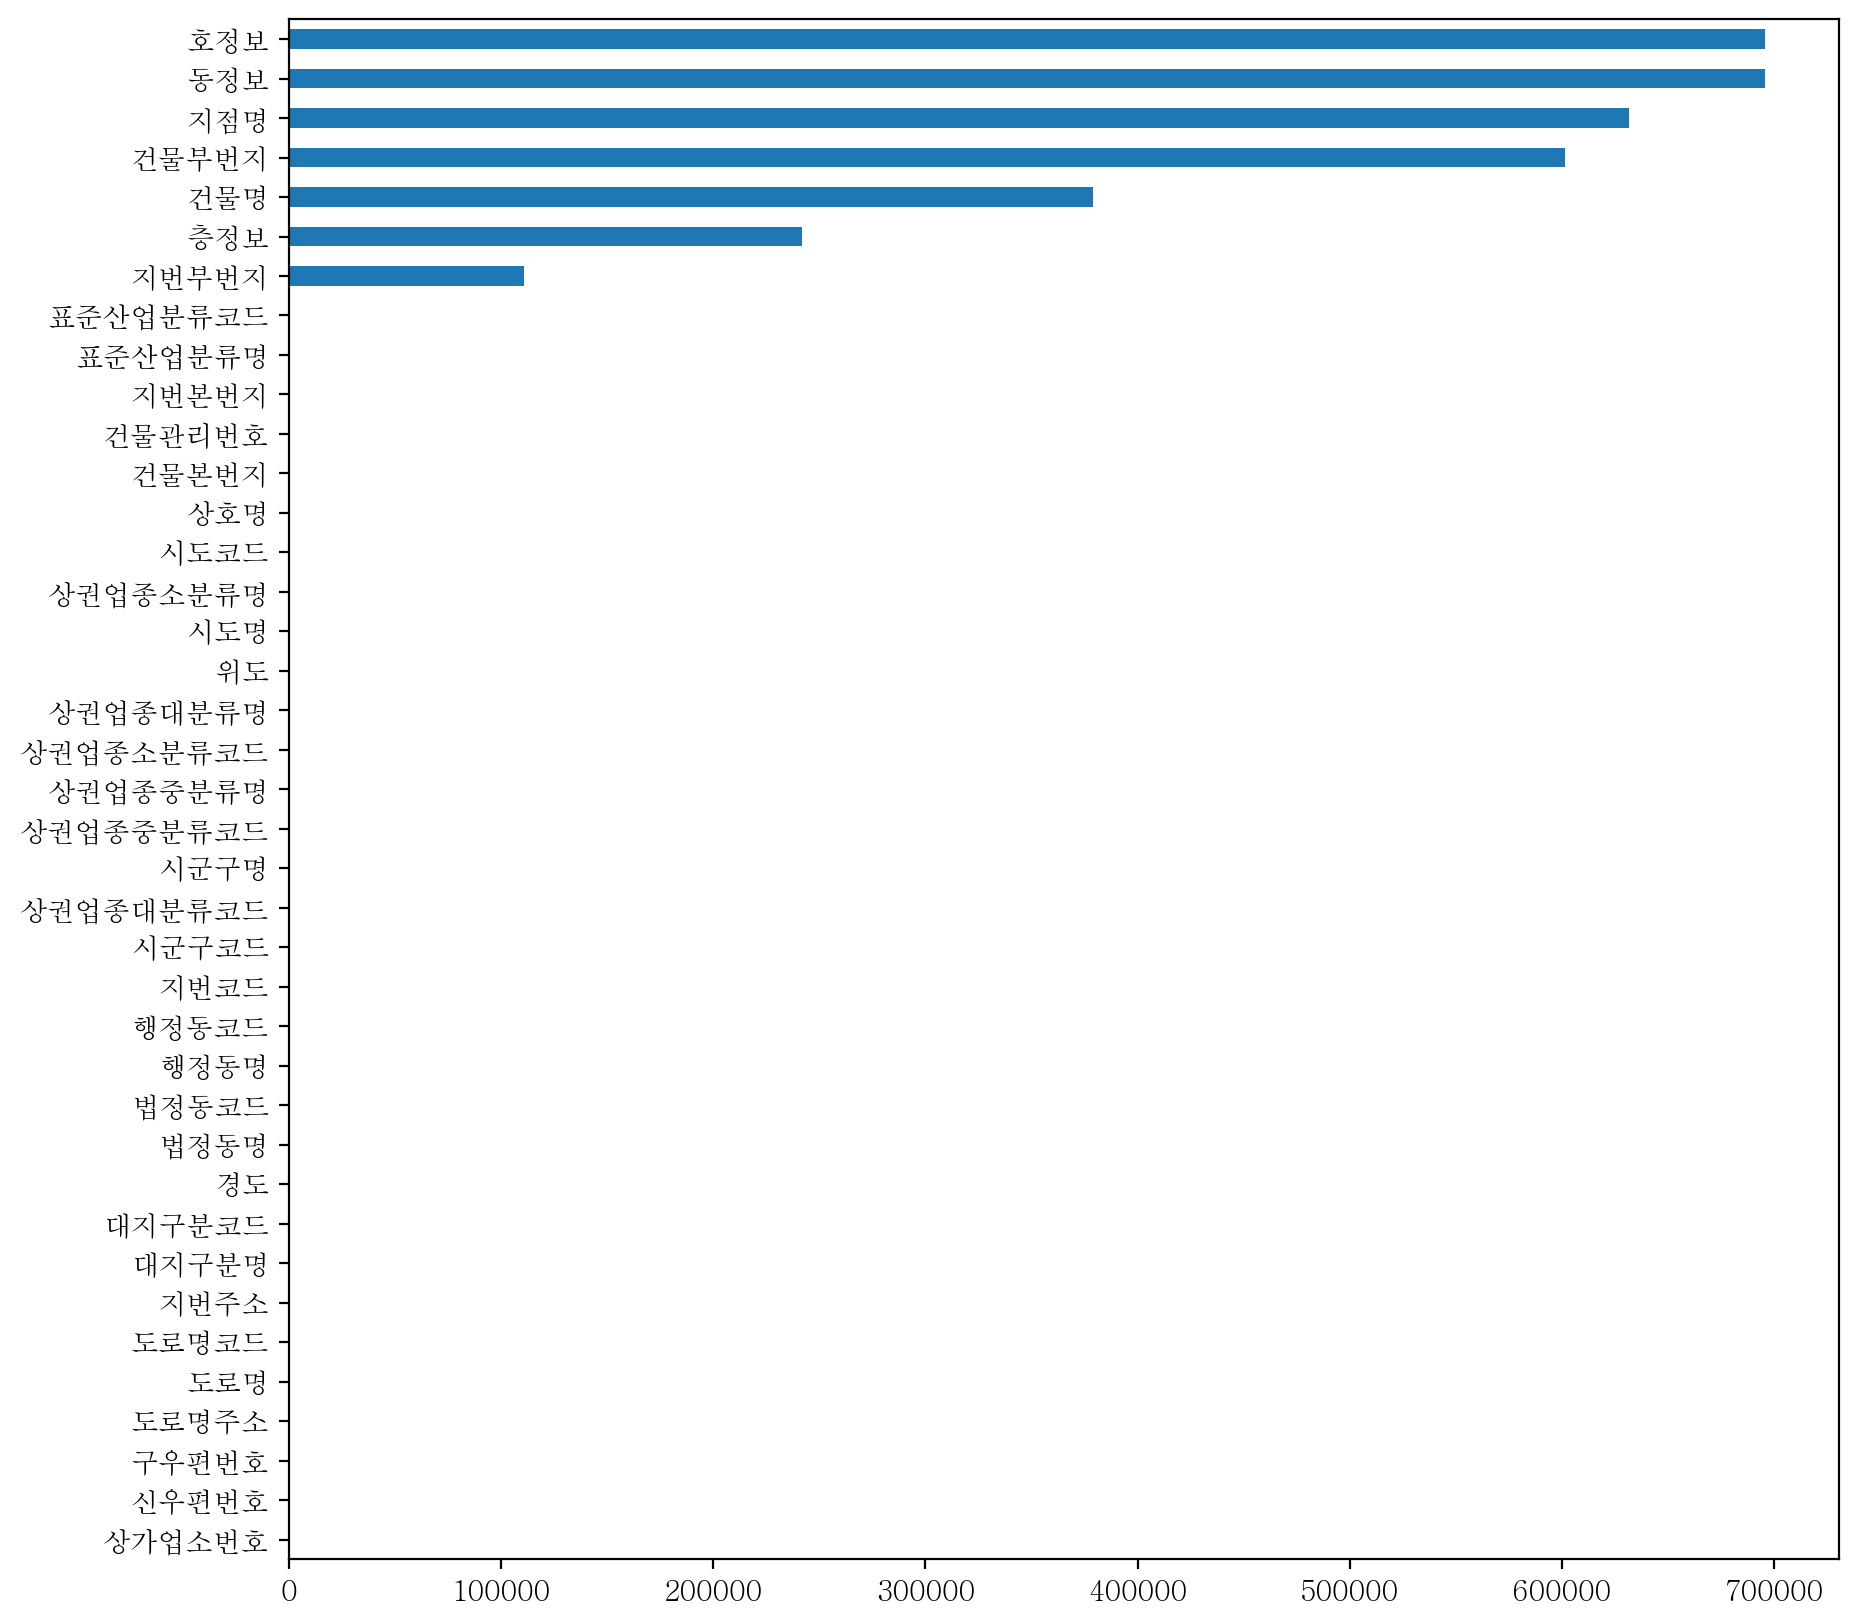

In [72]:
missing_cnt.sort_values(ascending = True).plot.barh(figsize=(10,10),)

## ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [78]:
only_missing_cnt = missing_cnt[missing_cnt != 0] # .sort_values(ascending = False)

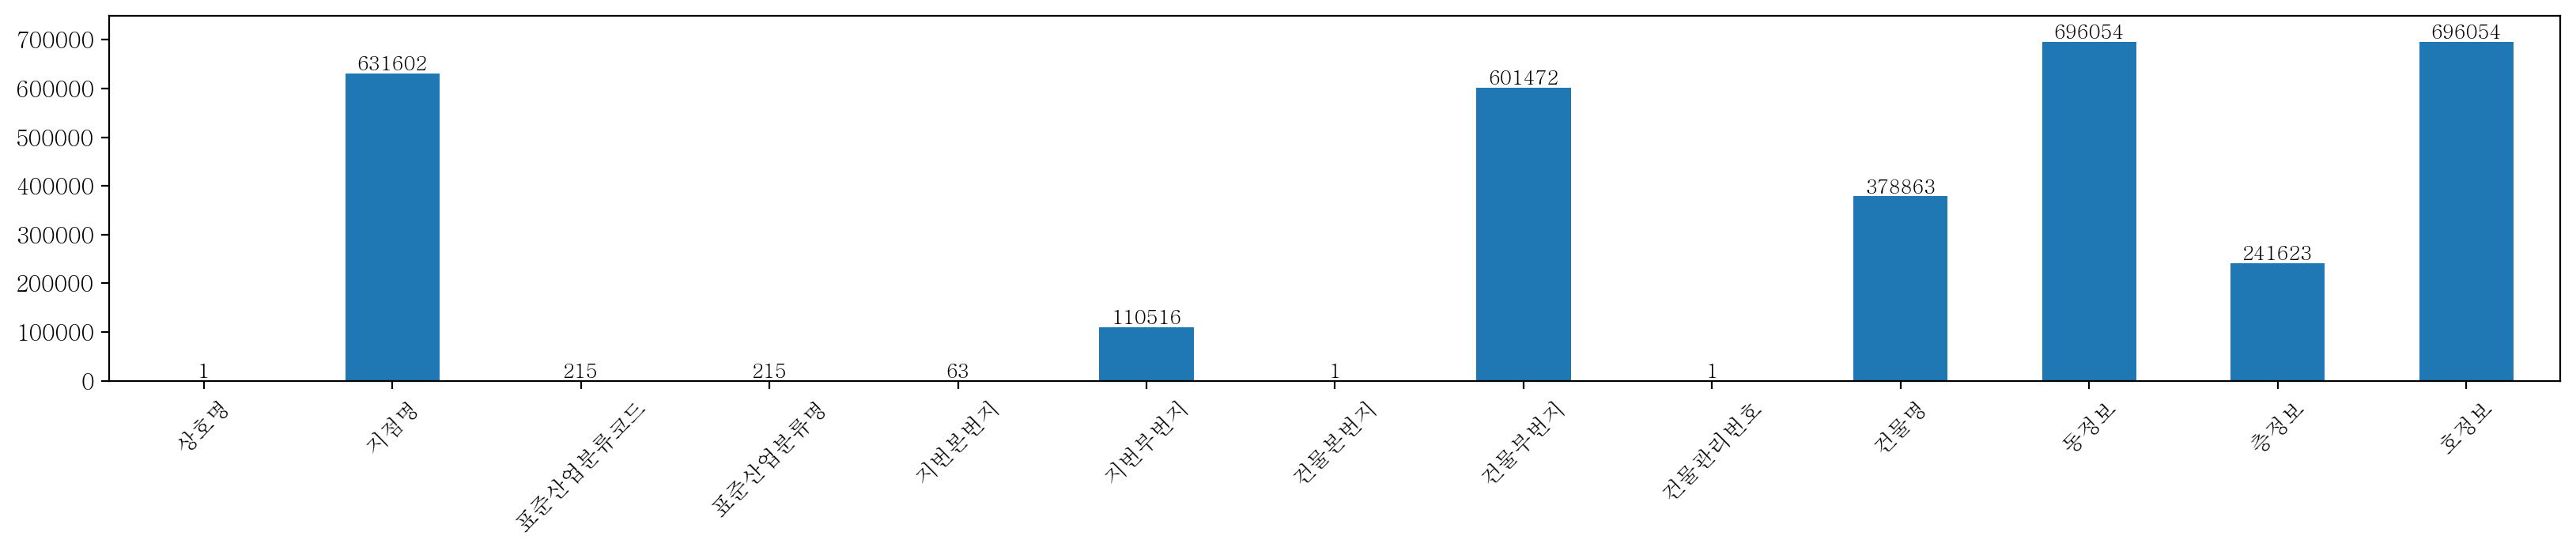

In [132]:
only_missing_cnt.plot.bar(figsize=(20,3), rot = 45, ylim = [0,750000])
# plt.text(0,0,123)
# only_missing_cnt.지점명
# only_missing_cnt.index
# for idx, val in enumerate(only_missing_cnt) :
#     if len(str(val)) == 6 :
#         plt.text(idx-0.2, val+25000, val, weight = 'bold')
#     elif len(str(val)) == 3 :
#         plt.text(idx-0.1, val+25000, val, weight = 'bold')
#     elif len(str(val)) == 2 :
#         plt.text(idx-0.07, val+25000, val, weight = 'bold')
#     elif len(str(val)) == 1 :
#         plt.text(idx-0.05, val+25000, val, weight = 'bold')
for idx, val in enumerate(only_missing_cnt) :
    plt.text(idx, val, val, weight = 'bold', va = 'bottom', ha = 'center', size = 9)

Text(0.5, 1.0, '결측치 개수')

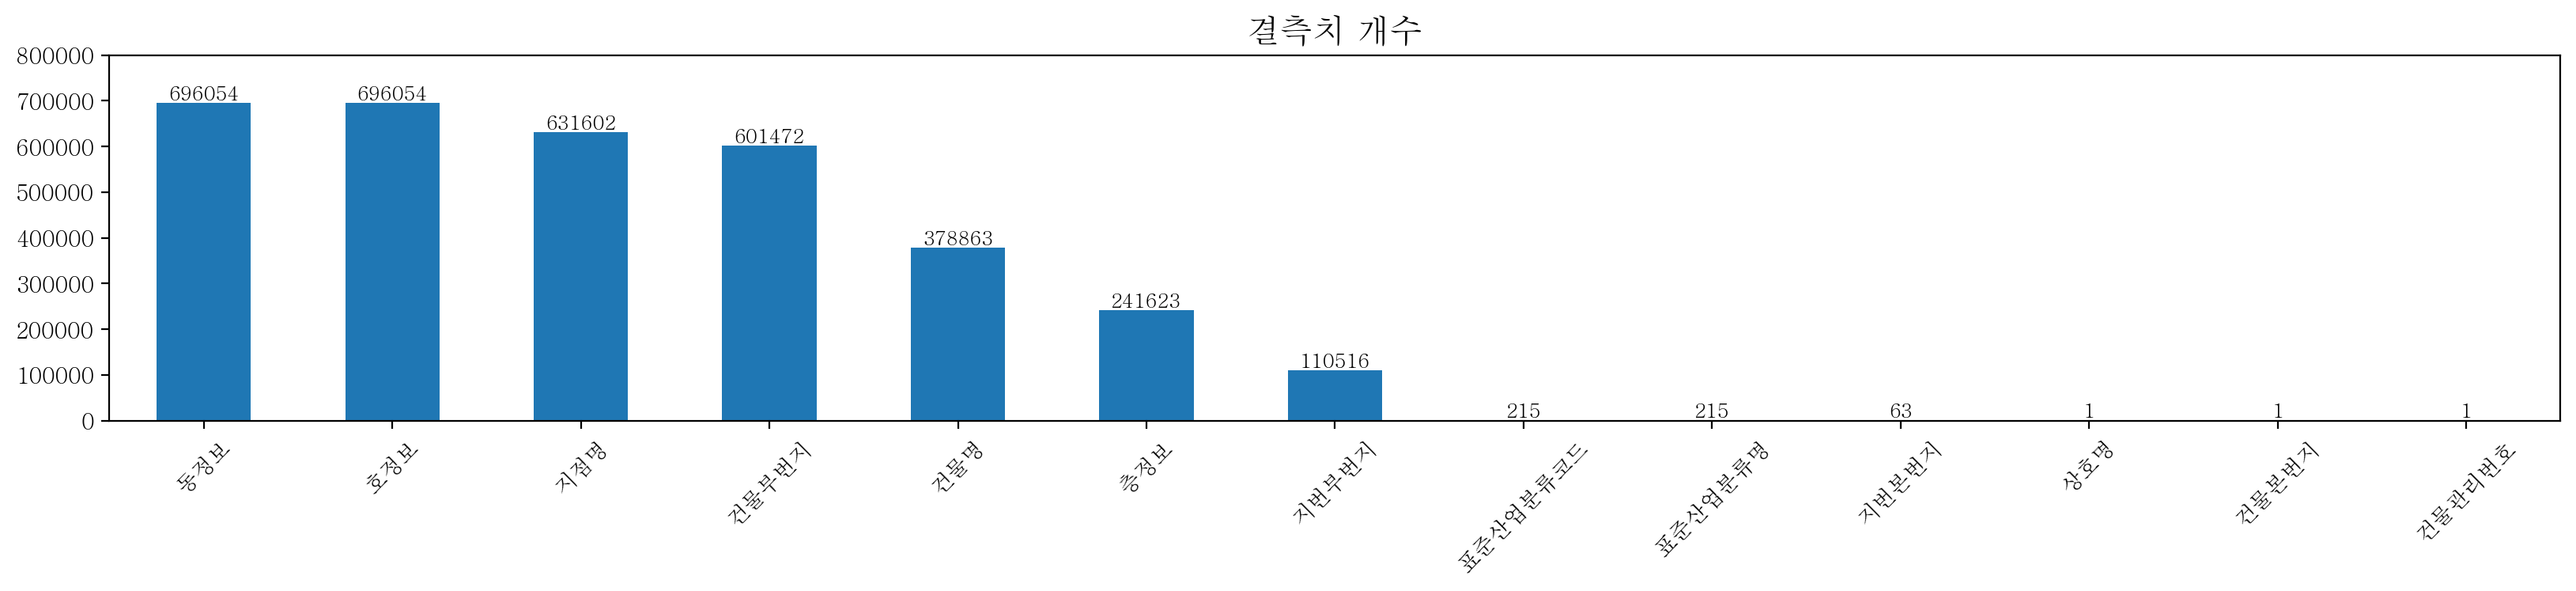

In [163]:
only_missing_cnt.sort_values(ascending = False).plot.bar(figsize=(20,3), rot = 45)
plt.ylim([0,800000])
for idx, val in enumerate(only_missing_cnt.sort_values(ascending = False)) :
    plt.text(idx, val, val, weight = 'bold', va = 'bottom', ha = 'center', size = 9)
plt.title('결측치 개수', size = 15)

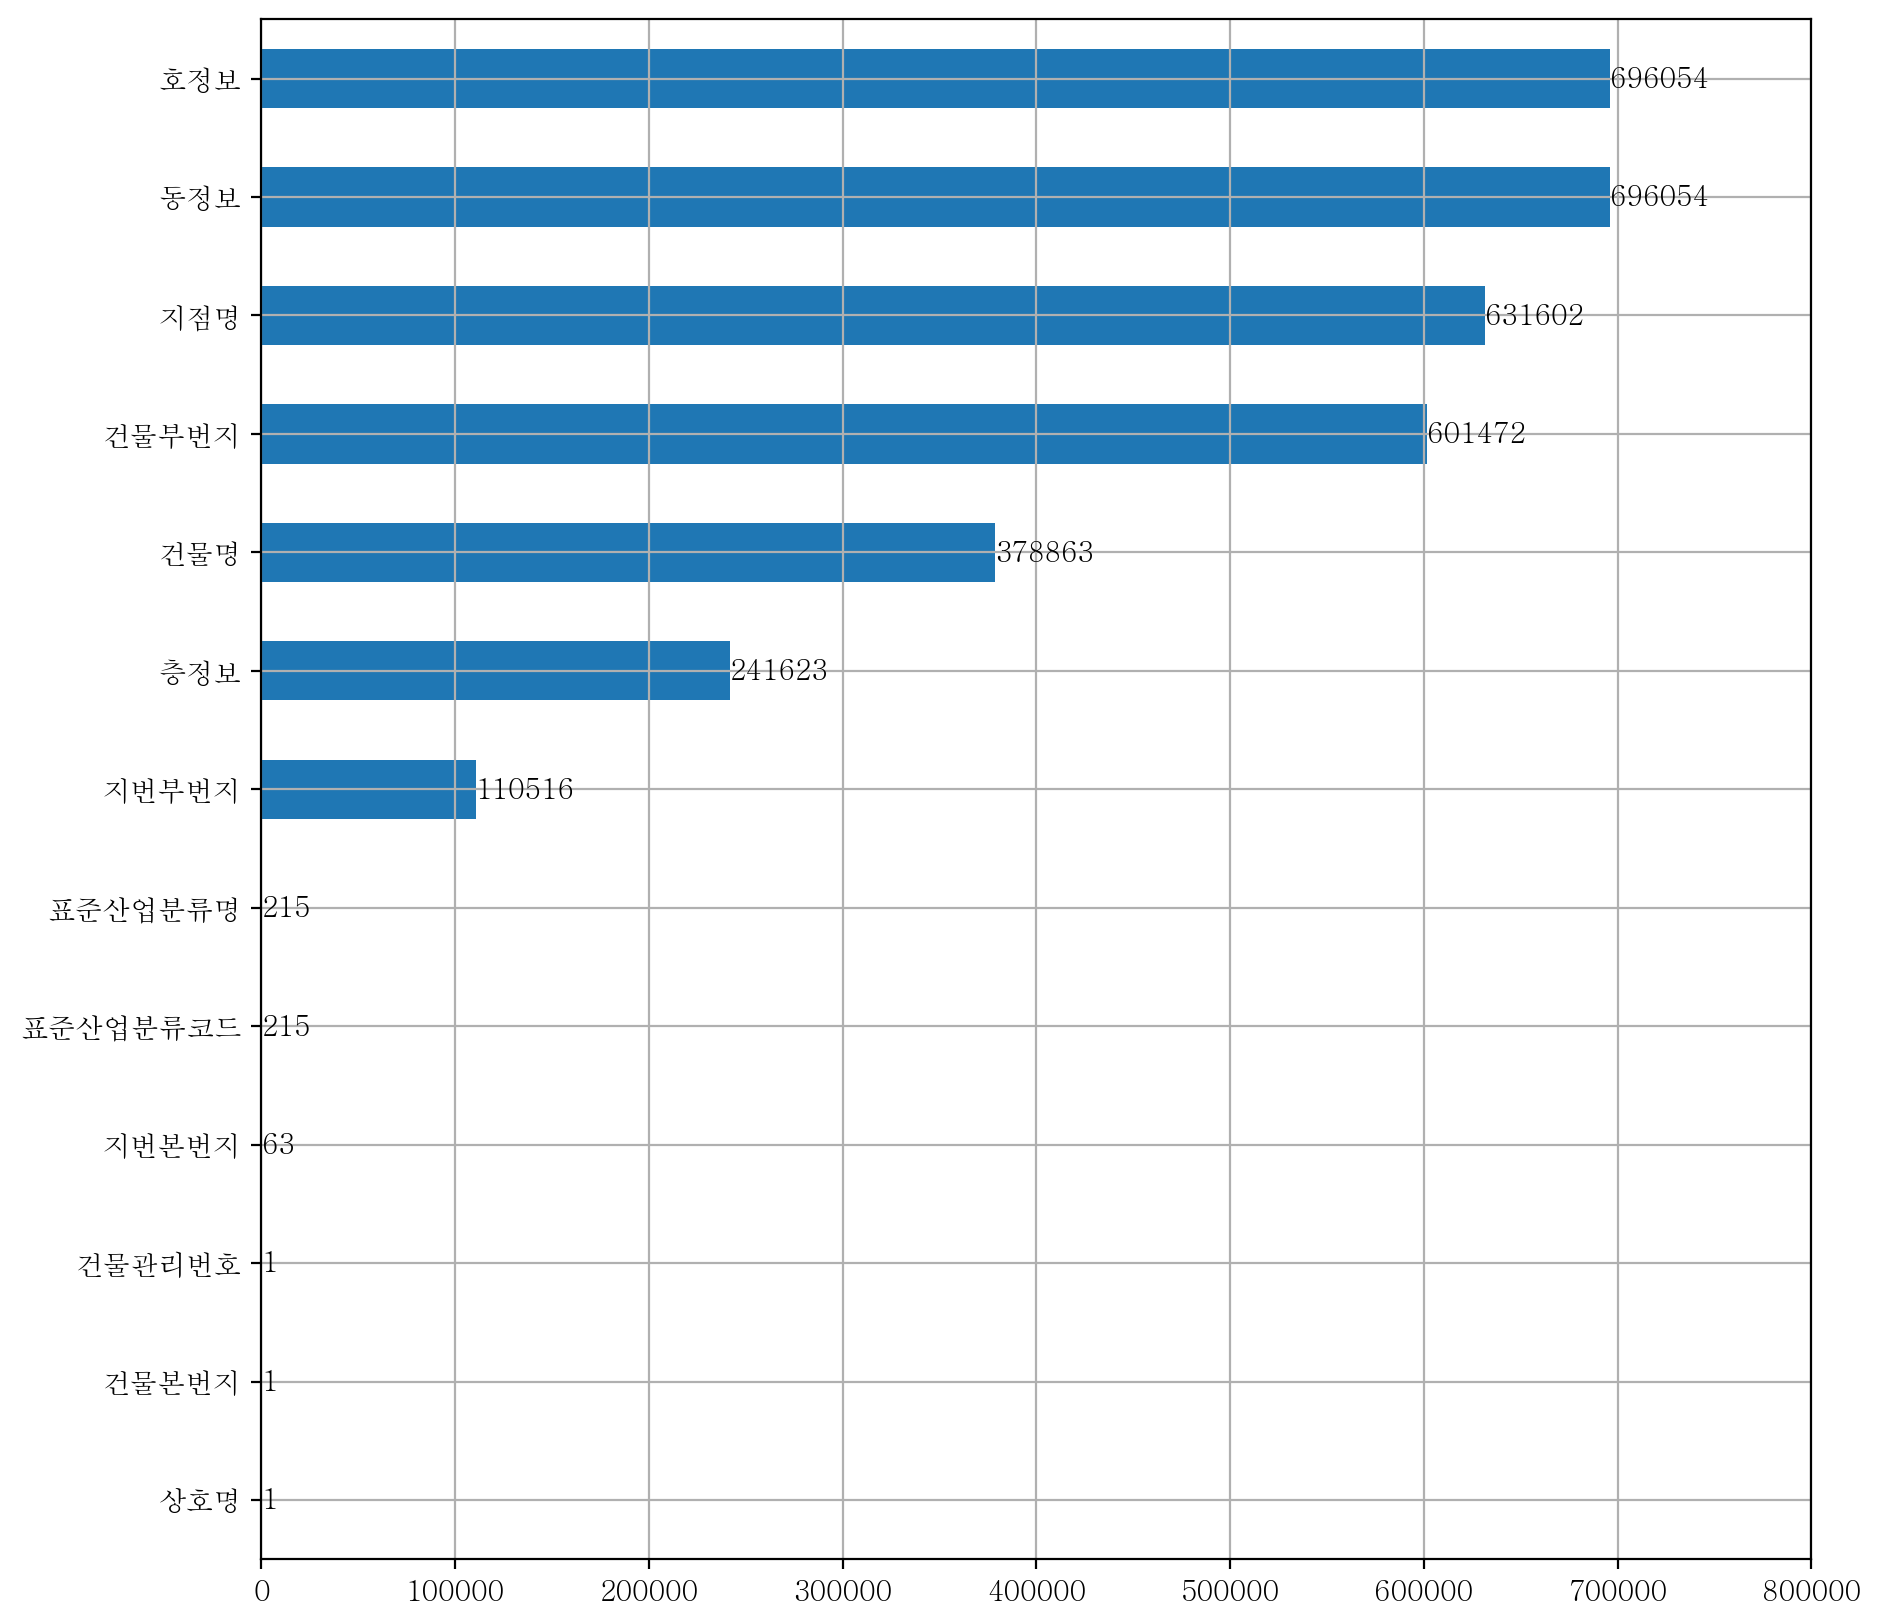

In [161]:
only_missing_cnt.sort_values(ascending = True).plot.barh(figsize=(10,10),)
plt.xlim([0,800000])
for idx, val in enumerate(only_missing_cnt.sort_values(ascending = False)) :
    plt.text(val, len(only_missing_cnt)-1-idx, val, weight = 'bold', va = 'center', ha = 'left', size = 10, color = 'black')
plt.grid()

# 4. df 데이터셋에서 사용하지 않을 컬럼 제거

## ① 결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.

In [172]:
not_use = df.isna().sum().sort_values(ascending = False).head(9)

In [174]:
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [175]:
# 컬럼 삭제 전 메모리 사용량 : 207.1+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

In [176]:
print('컬럼 제거 전 shape :', df.shape)
df.drop(not_use.index, axis = 1, inplace= True)
print('컬럼 제거 후 shape :', df.shape)

컬럼 제거 전 shape : (696054, 39)
컬럼 제거 후 shape : (696054, 30)


In [177]:
# 1차 컬럼 삭제 후 메모리 용량 : 159.3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   상권업종대분류코드  696054 non-null  object 
 3   상권업종대분류명   696054 non-null  object 
 4   상권업종중분류코드  696054 non-null  object 
 5   상권업종중분류명   696054 non-null  object 
 6   상권업종소분류코드  696054 non-null  object 
 7   상권업종소분류명   696054 non-null  object 
 8   시도코드       696054 non-null  int64  
 9   시도명        696054 non-null  object 
 10  시군구코드      696054 non-null  int64  
 11  시군구명       696054 non-null  object 
 12  행정동코드      696054 non-null  int64  
 13  행정동명       696054 non-null  object 
 14  법정동코드      696054 non-null  int64  
 15  법정동명       696054 non-null  object 
 16  지번코드       696054 non-null  int64  
 17  대지구분코드     696054 non-null  int64  
 18  대지구분명      696054 non-null  object 
 19  지번본번지      695991 non-n

## ② 컬럼명에 “코드”나 “번호”가 있는 컬럼 제거
- ( df.columns.str.contains(“코드|번호”) 이용).
- ( df.columns.str.find(‘코드”)!=-1 ) | ( df.columns.str.find(‘번호”)!=-1 )


In [188]:
cols = df.columns

In [190]:
# 1안
cols[(cols.str.find('코드') != -1) | (cols.str.find('번호')!=-1)]

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [198]:
# 2안
drop_col = cols[cols.str.contains('코드|번호')]

In [201]:
df.drop(drop_col, axis=1, inplace=True)
df.tail(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
696053,안목,음식,한식,백반/한정식,부산광역시,동구,초량3동,초량동,대지,1200.0,부산광역시 동구 초량동 1200-4,부산광역시 동구 중앙대로214번길,3.0,부산광역시 동구 중앙대로214번길 3-10,129.041453,35.116696


## ③ 컬럼을 제거 후 제거 전과 memory usage를 확인하고 줄어든 columns수도 확인한다

In [202]:
# 2차 컬럼 삭제 후 메모리 용량 : 85.0+ MB 
# 기존 메모리 용량 : 207.1+ MB => 85.0+ MB
# 컬럼 : 39 => 16
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       696053 non-null  object 
 1   상권업종대분류명  696054 non-null  object 
 2   상권업종중분류명  696054 non-null  object 
 3   상권업종소분류명  696054 non-null  object 
 4   시도명       696054 non-null  object 
 5   시군구명      696054 non-null  object 
 6   행정동명      696054 non-null  object 
 7   법정동명      696054 non-null  object 
 8   대지구분명     696054 non-null  object 
 9   지번본번지     695991 non-null  float64
 10  지번주소      696054 non-null  object 
 11  도로명       696054 non-null  object 
 12  건물본번지     696053 non-null  float64
 13  도로명주소     696054 non-null  object 
 14  경도        696054 non-null  float64
 15  위도        696054 non-null  float64
dtypes: float64(4), object(12)
memory usage: 85.0+ MB


In [204]:
# 백업
df.to_csv('C:/ai_x/download/sharedata/상가정보_20250331/서울부산상가정보(최종).csv', index = False)

# 5/9 **실행 df 파일 I/O**

In [602]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Batang') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='default') # 경고 메세지
warnings.filterwarnings(action='ignore') # 경고 메세지 무시

sns.set(style = 'ticks', rc={'figure.figsize' : (16,4)})
plt.rc('font', family = 'Batang')
# 데이터 load
df = pd.read_csv('C:/ai_x/download/sharedata/상가정보_20250331/서울부산상가정보(최종).csv')

# 5. df 데이터셋의 값을 가져온다

In [205]:
# df = pd.read_csv('C:/ai_x/download/sharedata/상가정보_20250331/서울부산상가정보(최종).csv')

## ① 상호명 필드만 가져온다

In [225]:
df['상호명'].to_frameame()

,상호명
0,부동산임대김은숙
1,한국황토건축연구소
2,소망공인중개사사무소
3,고향집
4,보석나라
...,...
696049,포마크파티룸
696050,정옥농장
696051,지안영어교습소
696052,히어로스포츠


## ② 상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [207]:
df['상호명'].value_counts()

컴퓨터수리         576
입시·교과학원       351
입주청소          308
김밥천국          232
현대공인중개사사무소    195
             ... 
오오토리            1
이천산업            1
미가뷰티            1
가산문고            1
지안영어교습소         1
Name: 상호명, Length: 535747, dtype: int64

In [230]:
df.groupby('상호명')['시도명'].count().sort_values(ascending = False)

상호명
컴퓨터수리                  576
입시·교과학원                351
입주청소                   308
김밥천국                   232
현대공인중개사사무소             195
                      ... 
본푸드서비스삼표점주               1
본푸드서비스본우리집밥이마트수서점        1
본푸드서비스본우리집밥본그룹본사점        1
본푸드서비스본우리집밥대치위담한방병원      1
［주］세일캠퍼스                 1
Name: 시도명, Length: 535747, dtype: int64

In [233]:
df.pivot_table(index = '상호명', values = '시도명', aggfunc='count')

,시도명
상호명,
!아지트,1
&지헤어,1
&헤어,1
'S,1
'n'hairshop,1
...,...
９９세탁소,1
９９양행,1
；건축사사무소정인건축,1


In [228]:
# 결측치가 없는 열 확인
df.isna().sum()

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

## ③ “상호명”과 "도로명주소” 컬럼 가져오기

In [237]:
df[['상호명', '도로명주소']]
# df.loc[df.상호명 == '김밥천국', ['상호명', '도로명주소']]

,상호명,도로명주소
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
3,고향집,서울특별시 종로구 돈화문로4길 30
4,보석나라,서울특별시 구로구 개봉로3길 23
...,...,...
696049,포마크파티룸,부산광역시 부산진구 중앙대로 763-1
696050,정옥농장,부산광역시 기장군 장안읍 오리길 69-12
696051,지안영어교습소,부산광역시 해운대구 세실로 31
696052,히어로스포츠,부산광역시 사상구 가야대로366번길 22


## ④ 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

In [209]:
df.loc[:2]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


In [210]:
df.iloc[:3]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


# 6. 기술 통계값 보기


- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

### **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도



## ① df 데이터셋의 요약기술 통계량

In [244]:
df.describe() # 수치형 컬러에 대한 기술통계량
df.describe(include = 'all') # 모든 데이터를 포함시키기 위해 include 활용
df.describe(include = 'object') # object형에 대한 기술 통계량 : 최빈값, 최빈값 개수, 데이터종류개수, 데이터갯수

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,696053,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054,696054
unique,535747,10,75,247,2,39,628,647,2,220969,18864,223665
top,컴퓨터수리,음식,한식,백반/한정식,서울특별시,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,서울특별시 송파구 충민로 66
freq,576,193508,71670,34283,540517,64716,13655,18140,695225,938,4462,1200


In [247]:
df.describe(exclude=['object','int64']) # [object형, int64형]을 제외한 기술 통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


In [249]:
# object형의 기술통계량 df.describe(inclued = ['object'])
# object형 데이터
df.select_dtypes('object').head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,서울특별시 종로구 삼청로 122-1


## ② df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다

In [215]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지번본번지   695991 non-null  float64
 1   건물본번지   696053 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


## ③ “위도", "경도” 컬럼만의 요약 기술통계량

In [254]:
df[['위도','경도']].describe()
df[['위도','경도']].dtypes

위도    float64
경도    float64
dtype: object

# 7.	단변량 수치형 변수 시각화

## ①	위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

<Axes: ylabel='Frequency'>

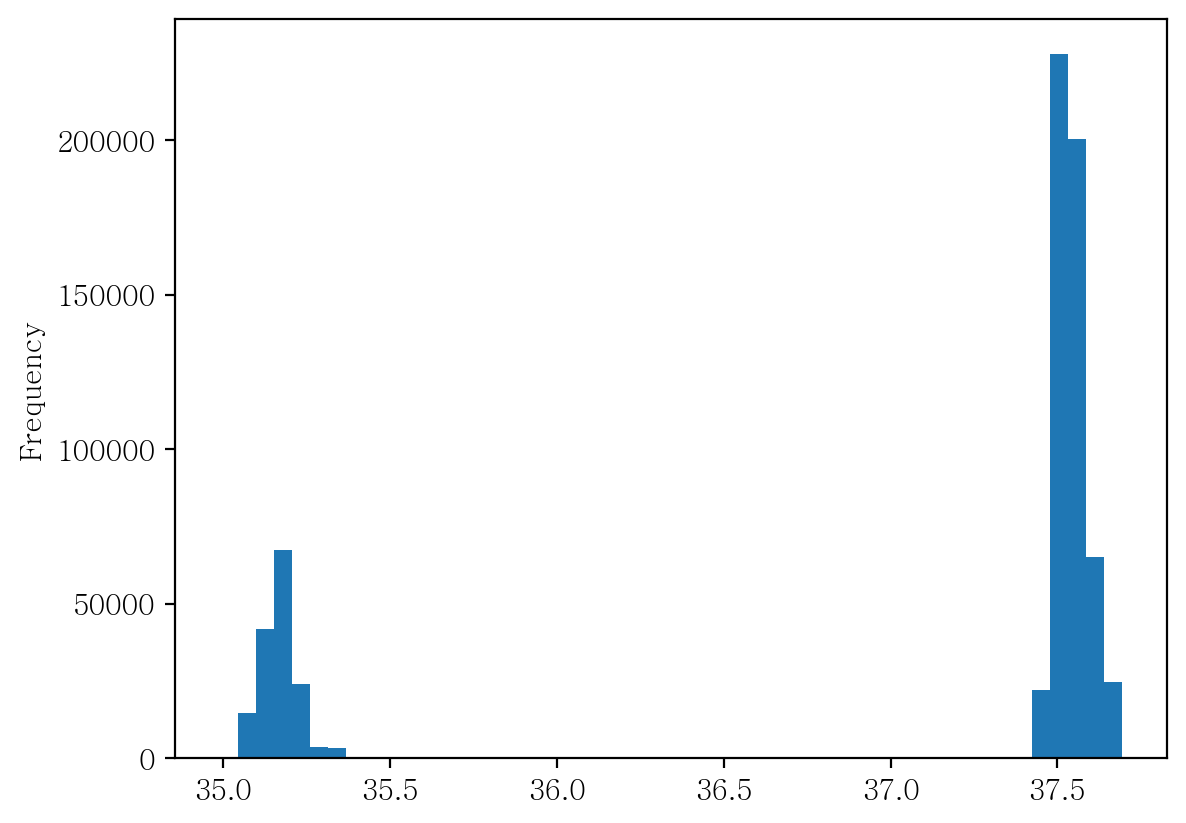

In [291]:
df['위도'].plot.hist(bins=50)

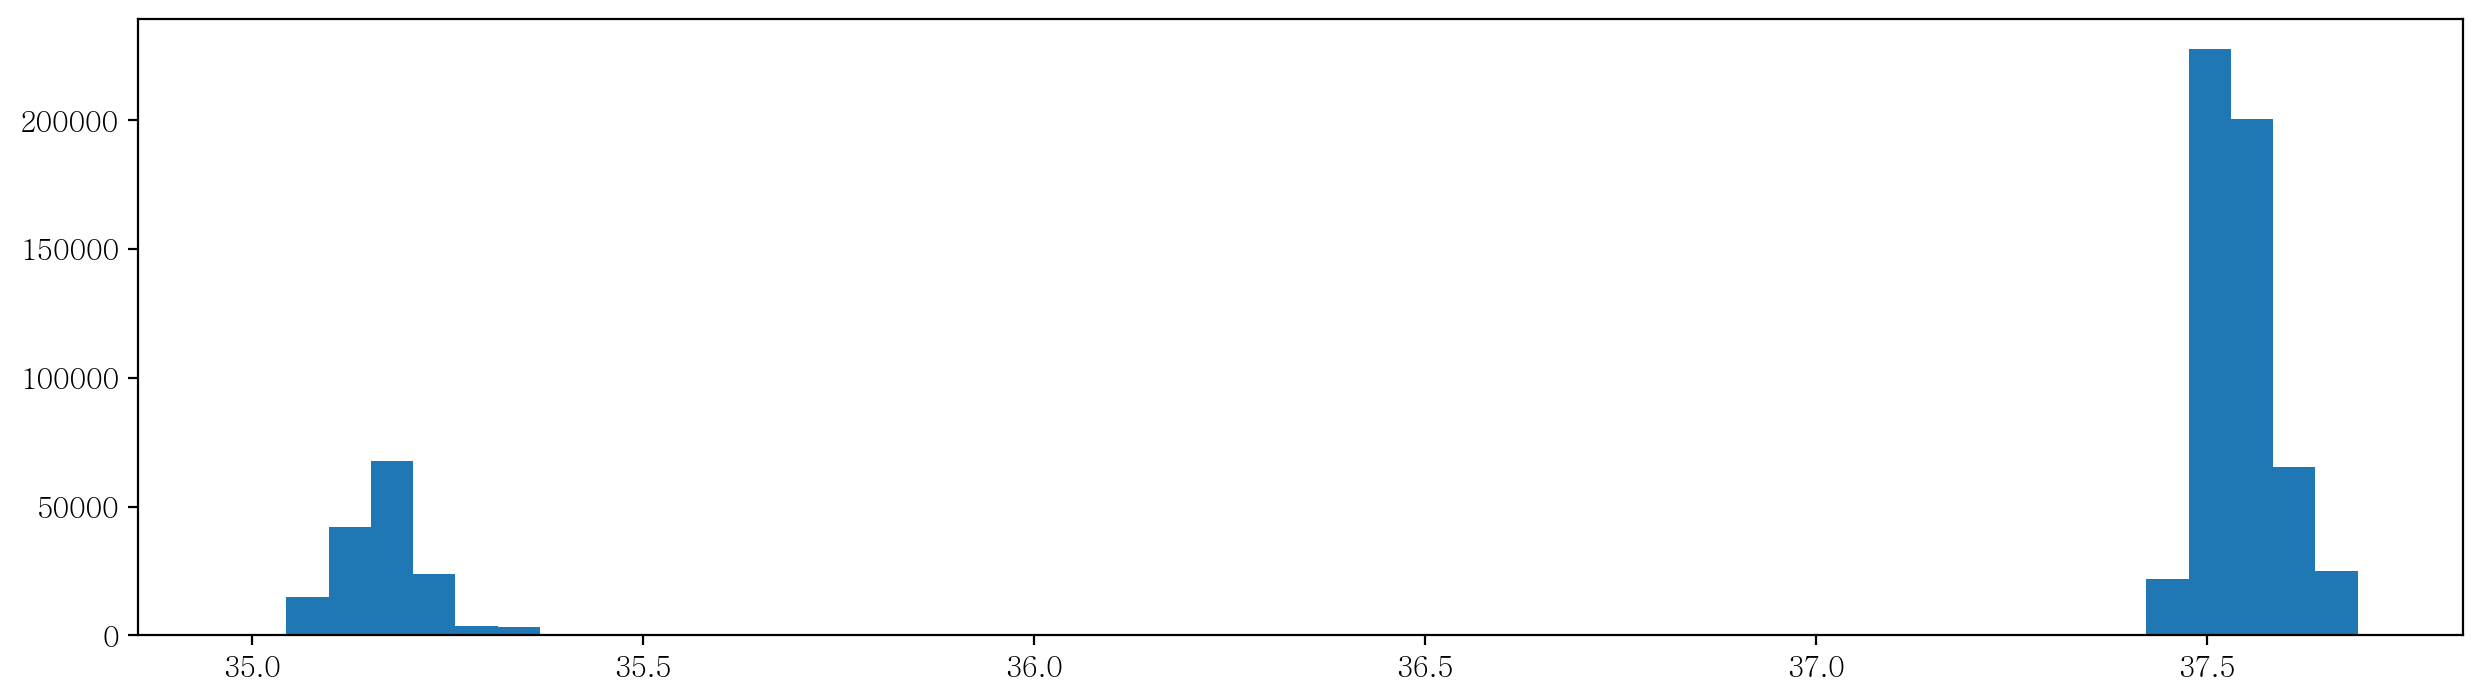

In [284]:
plt.figure(figsize=(15,4))
plt.hist(x=df.위도, bins=50)
plt.show()

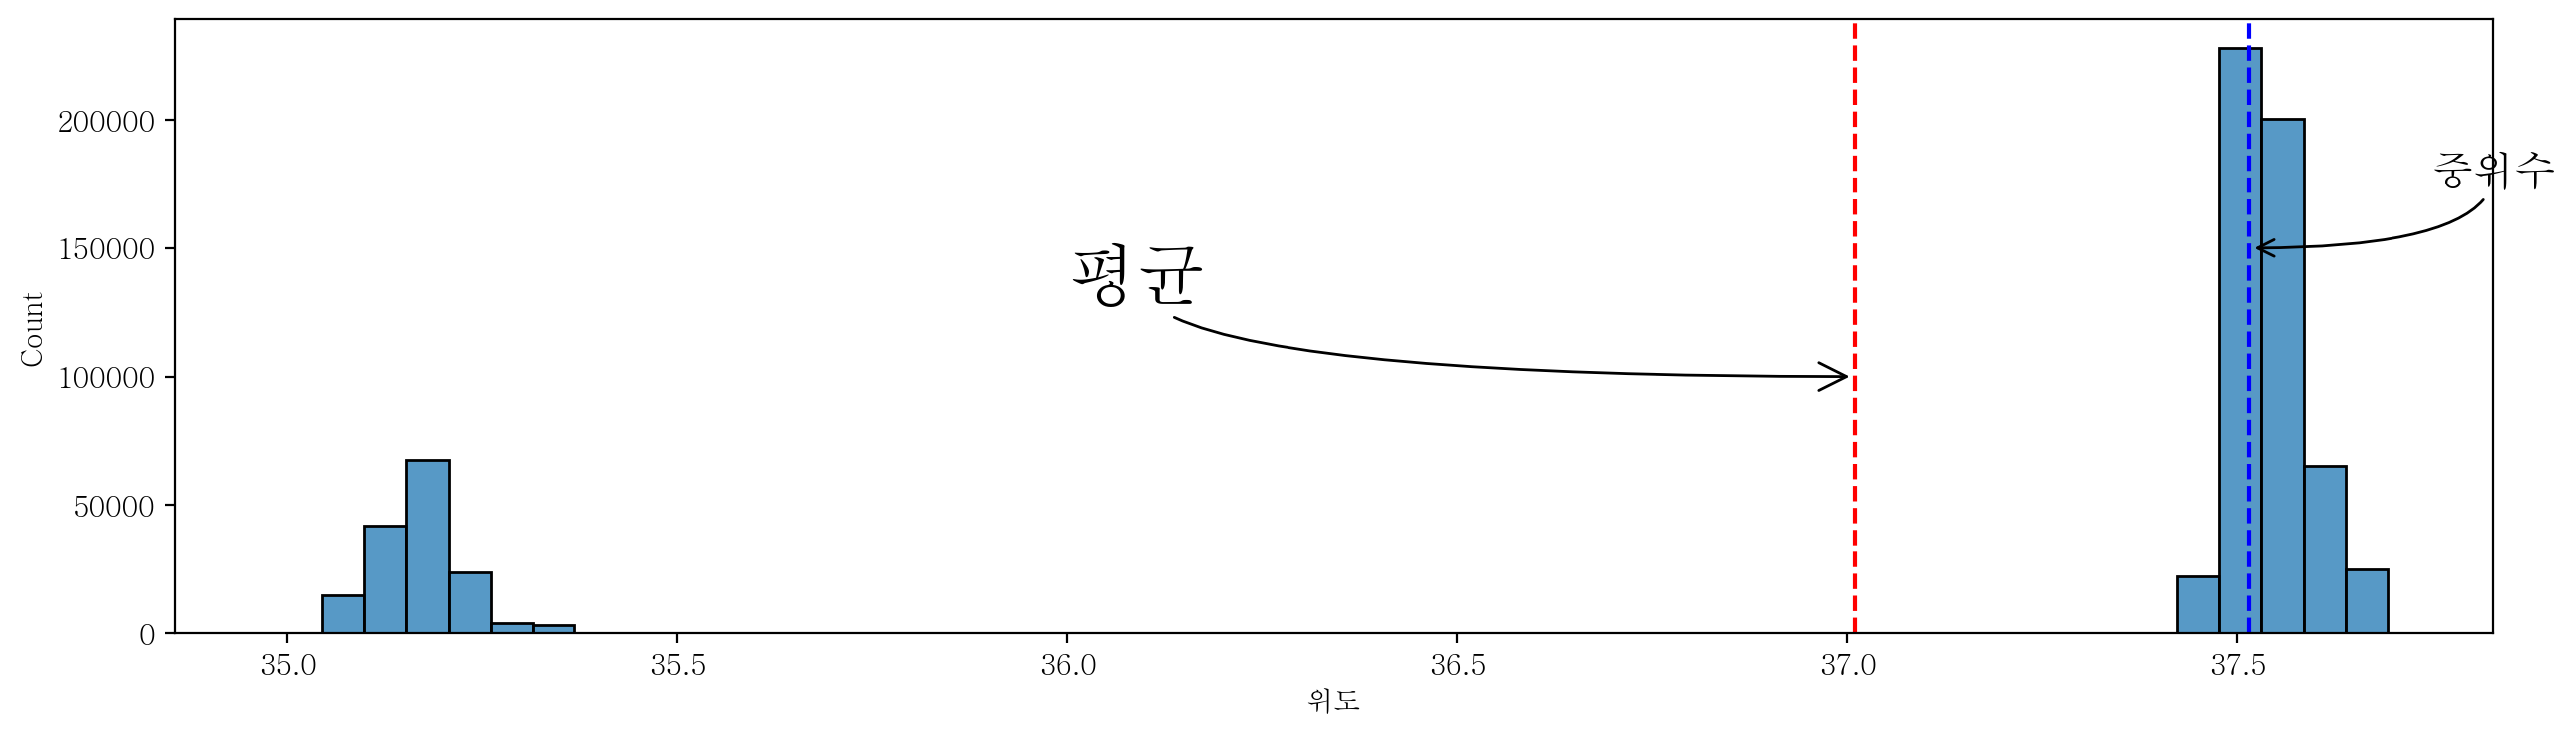

In [327]:
plt.figure(figsize=(15,4))
sns.histplot(data = df, x = '위도', bins = 50)
plt.axvline(df['위도'].mean(), color = 'r', linestyle = '--')
plt.axvline(df['위도'].median(), color = 'b', linestyle = '--')
plt.annotate('평균',xy=(df['위도'].mean(),100000),xytext=(36,130000),arrowprops=dict(arrowstyle = '->', connectionstyle = 'angle3'), size = 25)
plt.annotate('중위수',xy=(df['위도'].median(),150000),xytext=(37.75,175000),arrowprops=dict(arrowstyle = '->', connectionstyle = 'angle3'), size = 15)
plt.show()

In [322]:
# 왜도 :  평균을 기준으로 치우친 정도
# 오른쪽으로 치우침 : 왜도가 음수. 평균 < 중위수
# 왼쪽으로 치우침 : 왜도가 양수. 평균 > 중위수
df['위도'].skew() 

-1.3235077358631402

## ② 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

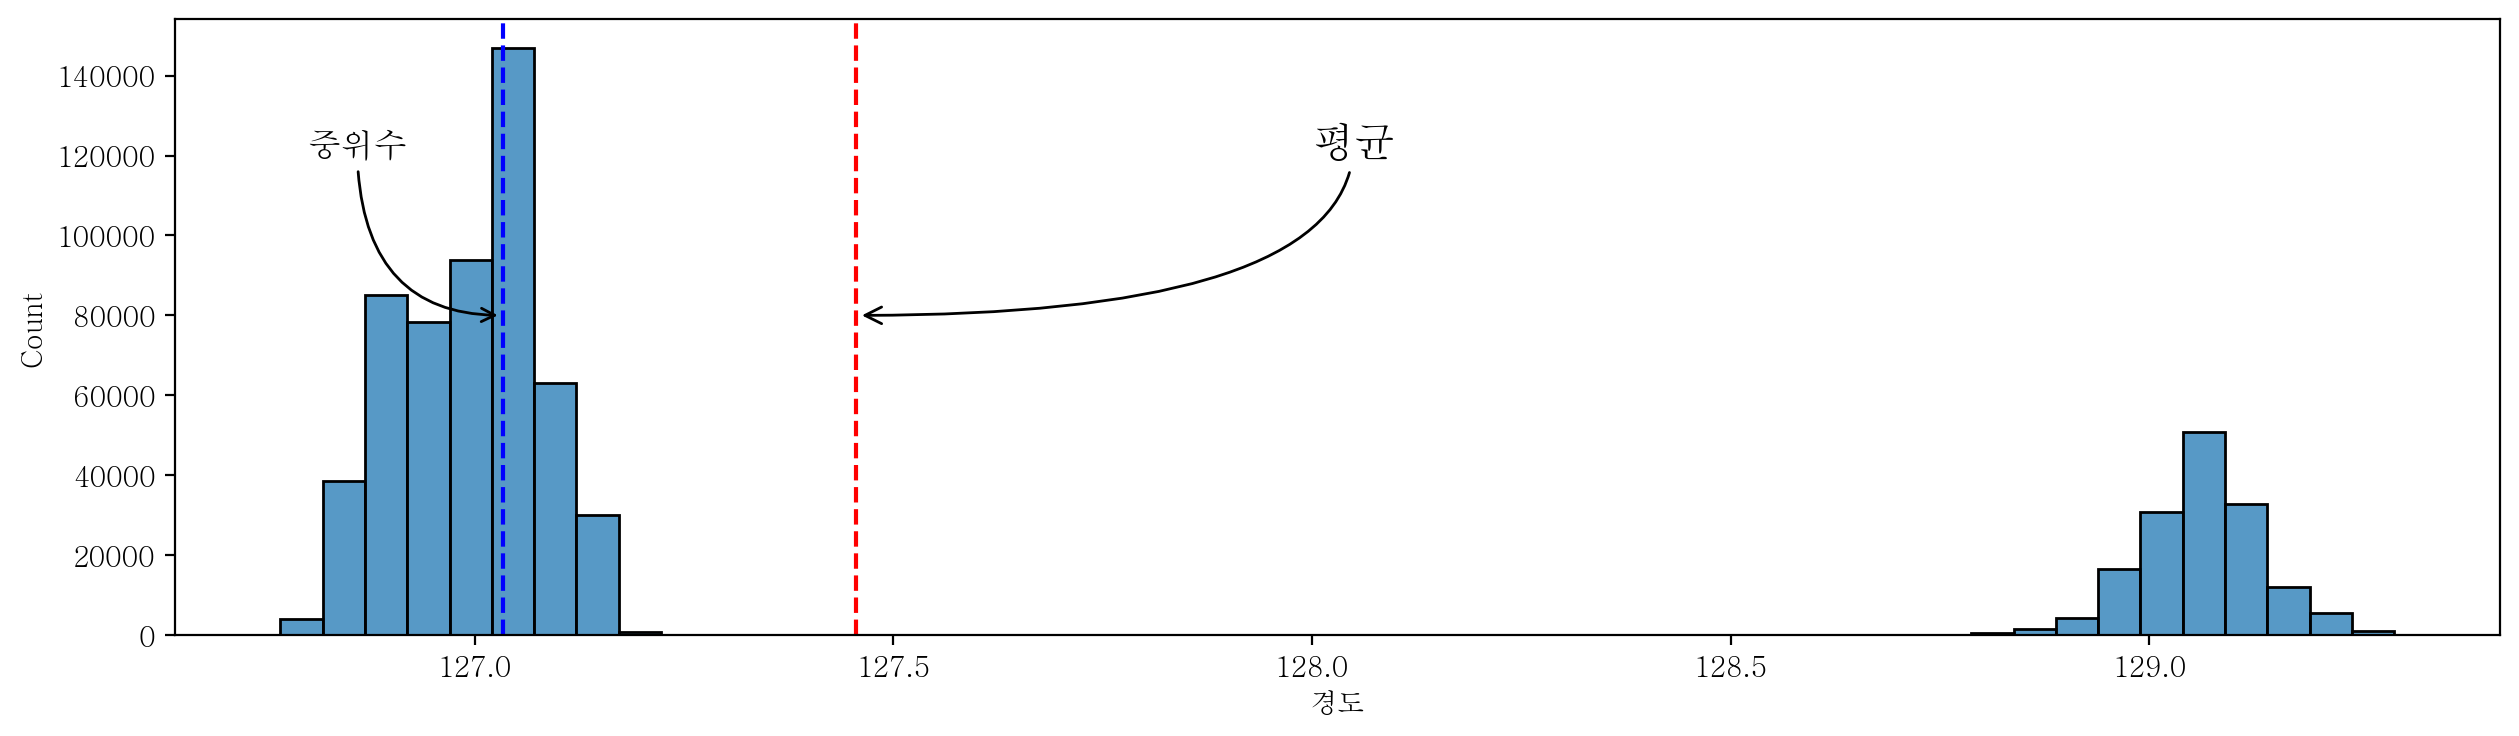

In [342]:
plt.figure(figsize=(15,4))
sns.histplot(data = df, x = '경도', bins = 50)
plt.axvline(df['경도'].mean(), color = 'r', linestyle = '--')
plt.annotate('평균',xy=(df['경도'].mean(),80000), xytext = (128,120000), arrowprops = dict(arrowstyle = '->', connectionstyle = 'angle3'), size = 15)
plt.axvline(df['경도'].median(), color = 'b', linestyle = '--')
plt.annotate('중위수',xy=(df['경도'].median(),80000), xytext = (126.8,120000), arrowprops = dict(arrowstyle = '->', connectionstyle = 'angle3'), size = 12)
plt.show()

<Axes: ylabel='Frequency'>

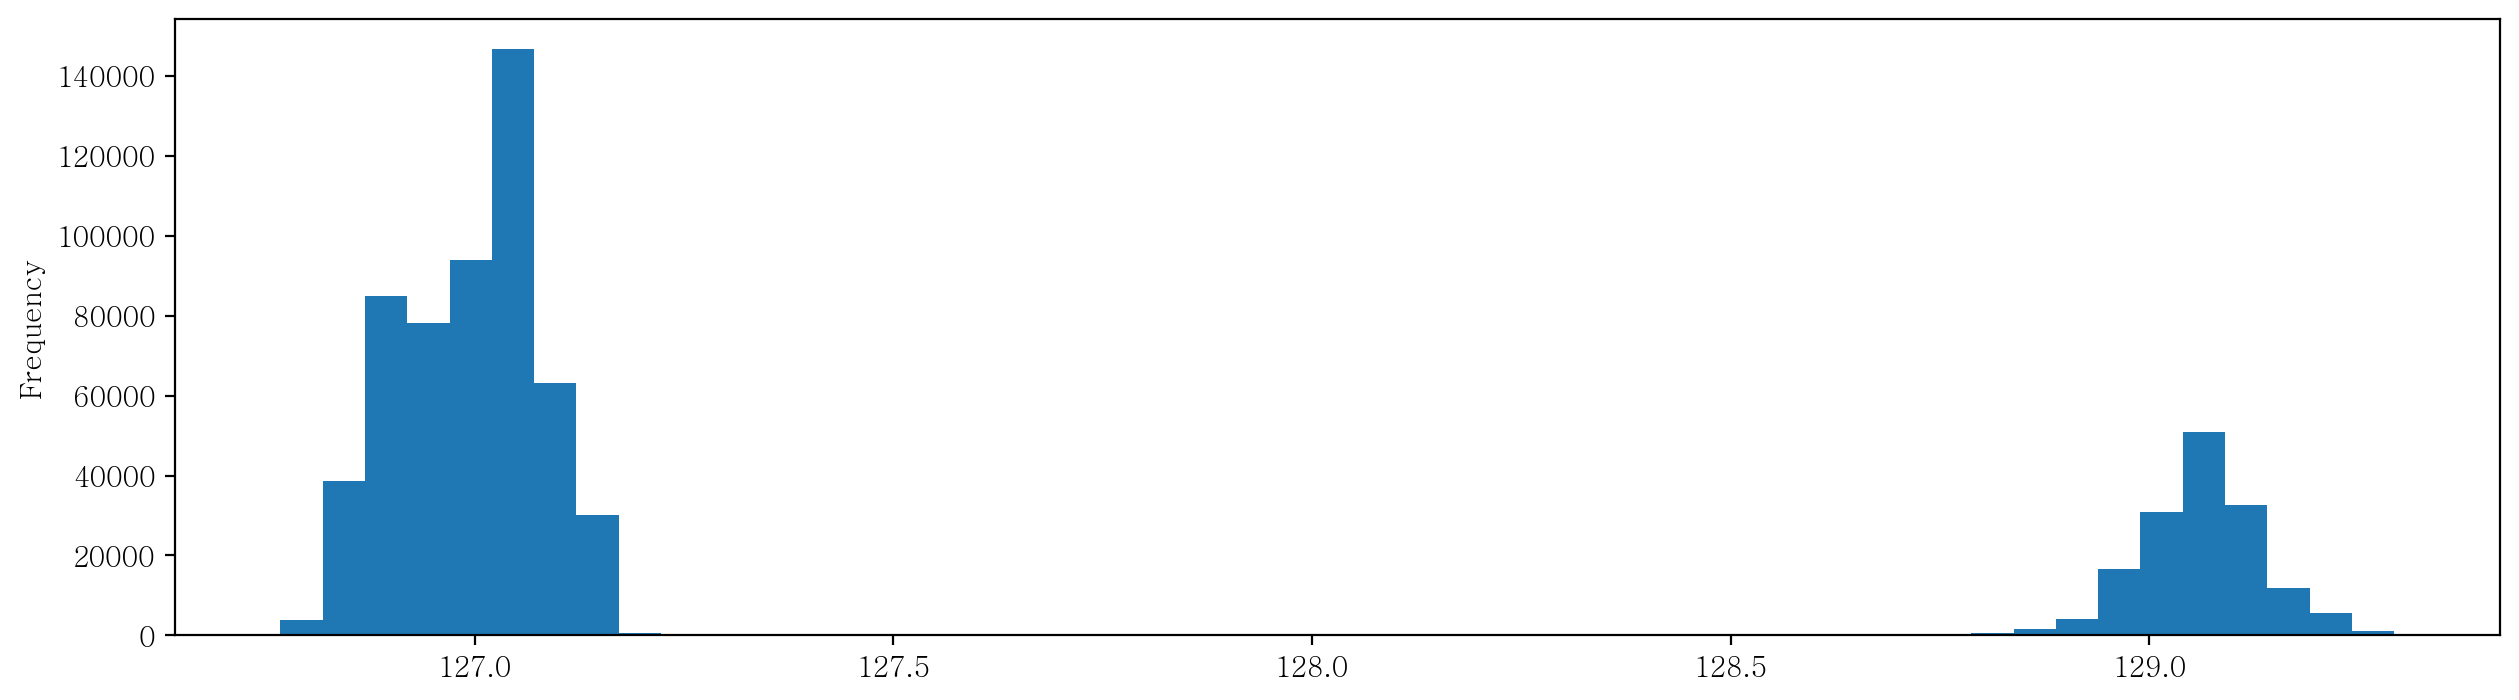

In [318]:
plt.figure(figsize=(15,4))
df['경도'].plot.hist(bins=50)

In [328]:
df['경도'].skew() # 양수, 왼쪽으로 치우침

1.3076255398048455

# 8. 상관계수

-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)

## ①	전체 숫자 컬럼끼리의 상관계수

In [351]:
corr = df.corr(numeric_only = True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## ②	상관계수를 이용하여 heatmap 시각화
참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

<Axes: >

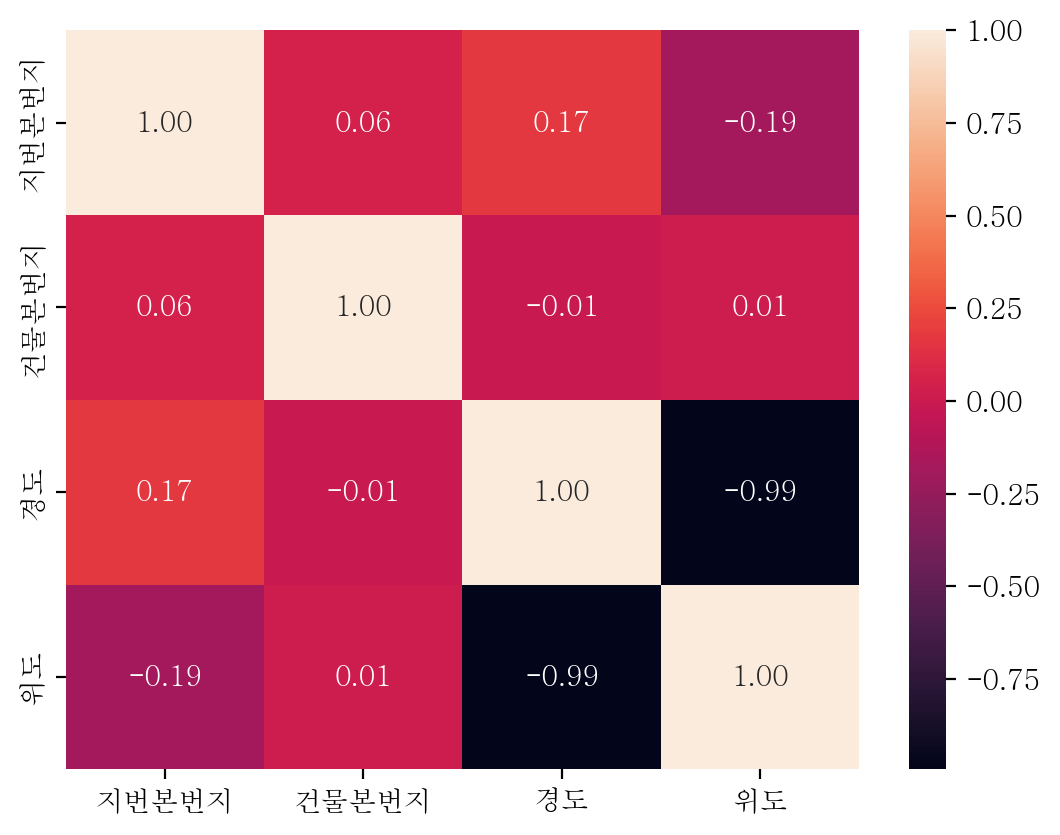

In [355]:
sns.heatmap(data = df.corr(numeric_only = True), annot=True, fmt = '.2f')

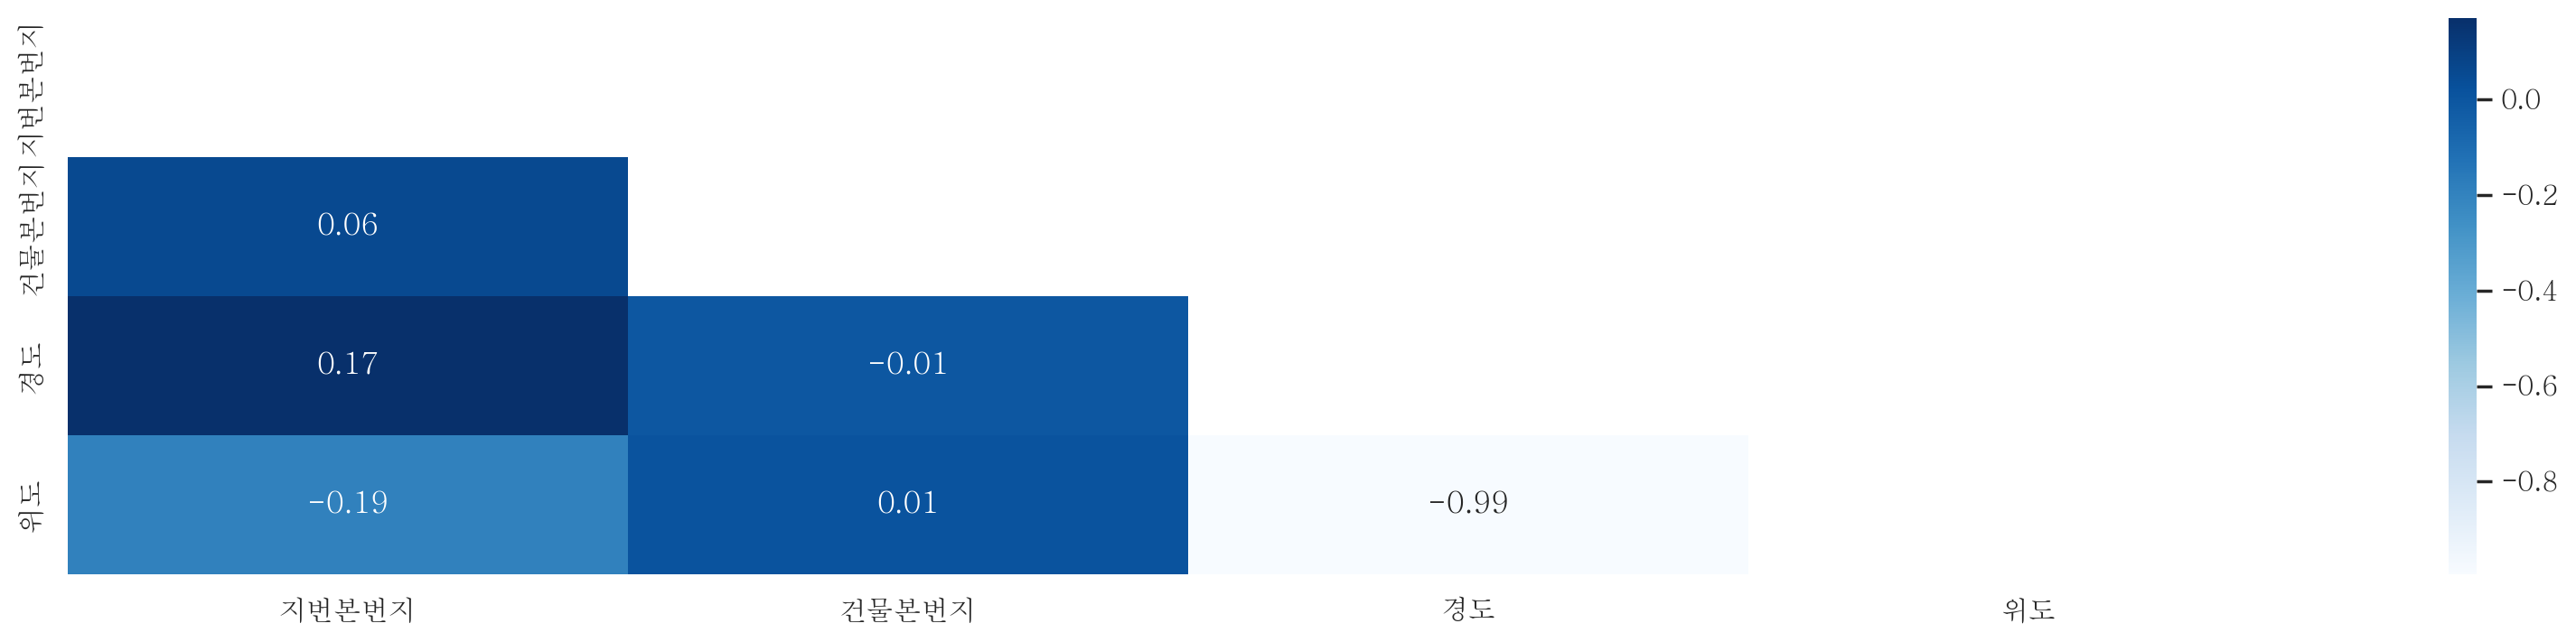

In [372]:
mask = mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,4))
sns.heatmap(data = df.corr(numeric_only = True), annot=True, fmt = '.2f', mask = mask, cmap = 'Blues')
plt.show()

In [385]:
a = np.array([[2.0,1,3],
             [1,1,3],
             [1,1,3]]) # 3행 3열짜리 배열
np.ones((2,2), dtype = bool) # dtype 기본값 float64
# np.ones((tup)) : 매개변수에 온 튜플 구조의 배열에 모든 값을 1. 로

array([[ True,  True],
       [ True,  True]])

In [386]:
np.ones_like(a) # a변수와 구조가 같은 배열에 1로 

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [387]:
np.ones_like(corr) # corr 변수와 구조가 같은 배열에 모든 값에 1.을 기입한 텐서 생성

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [389]:
temp = np.ones_like(corr, dtype = bool) # corr 변수와 구조가 같은 배열에 모든 값에 **boolian**을 기입한 텐서 생성
temp

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [396]:
# 삼각행렬을 만드는 넘파이 함수 np.triu()
# 상_삼각_행렬
np.triu(temp,k = 0) # k = 0 : 대각선 True, k = 1 : 대각선 False
mask = np.triu(temp,k = 0) # k = 0 : 대각선 True(default), k = 1 : 대각선 False

In [395]:
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [404]:
mask = np.triu(np.ones_like(corr, dtype=bool), k =0)
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

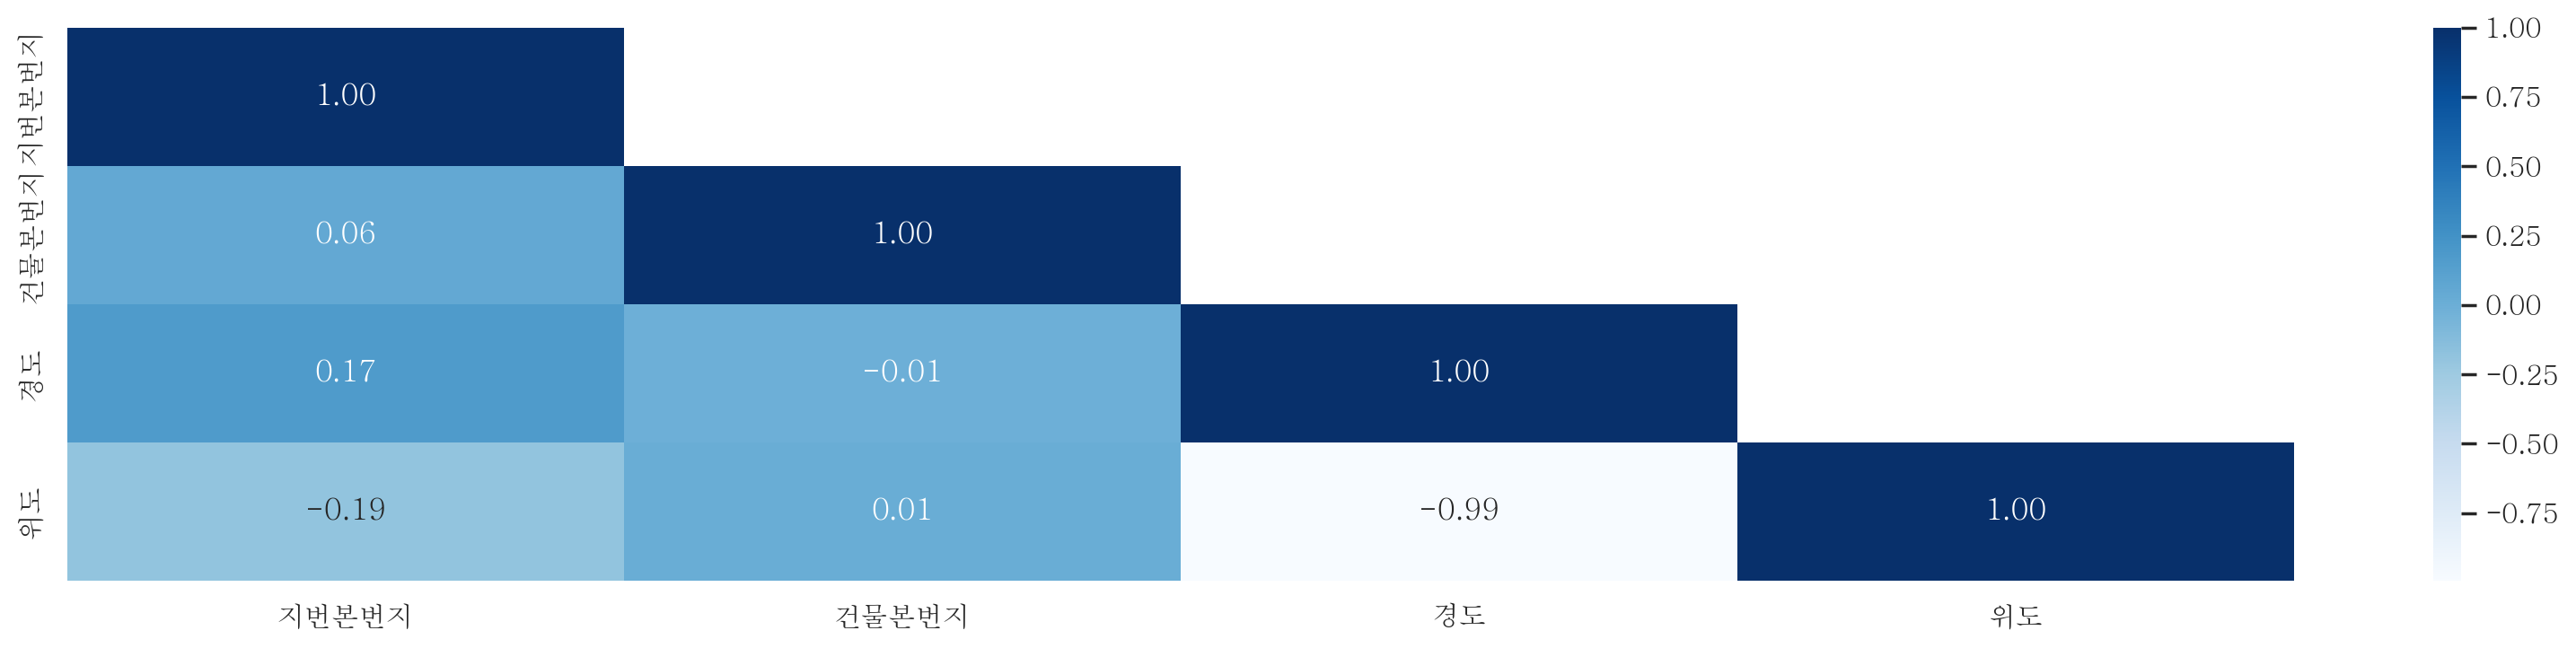

In [406]:
mask = mask = np.triu(np.ones_like(corr, dtype=bool), k = 1)
plt.figure(figsize=(20,4))
sns.heatmap(data = df.corr(numeric_only = True), annot=True, fmt = '.2f', mask =mask, cmap = 'Blues')
plt.show()

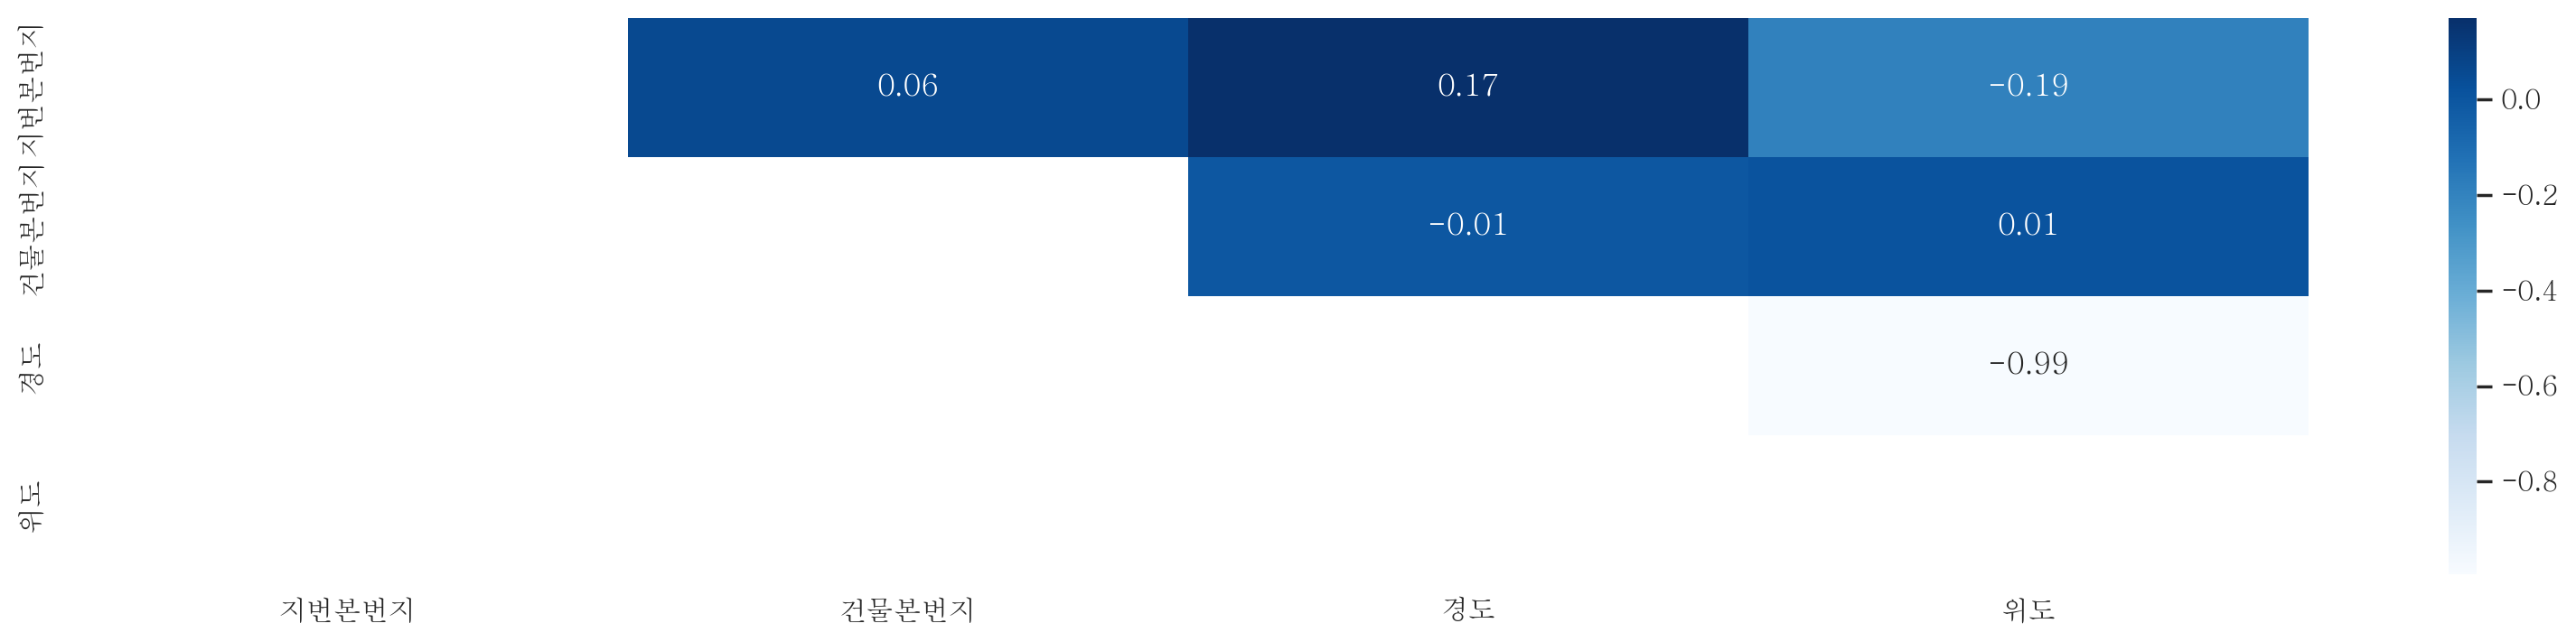

In [407]:
plt.figure(figsize=(20,4))
sns.heatmap(data = df.corr(numeric_only = True), annot=True, fmt = '.2f', mask =~ mask, cmap = 'Blues')
plt.show()